In [1]:
import sys
sys.path.append(r'C:\Users\gustavo\Documents\Data Science\08-GitHub\Portifolio\Regression\house_prices_single_model')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from collections import Counter

plt.style.use('ggplot')

In [3]:
from utils.graphs import plot_numerical_data, plot_categorical_data

# Read Dataset

In [4]:
file = r'..\data\processed\train.parquet'


df = pd.read_parquet(file)

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [6]:
print(f'Dataset rows and columns: {df.shape}')

Dataset rows and columns: (1460, 81)


In [7]:
# Selecionando as variáveis categóricas

cat_var = df.select_dtypes(include=['category','object', 'bool']).columns
cat_var

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [8]:
num_var = df.select_dtypes(include=['number']).columns
num_var

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

# Check target - Y_true

# Exploratory Analisys

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Check NA values

<Axes: >

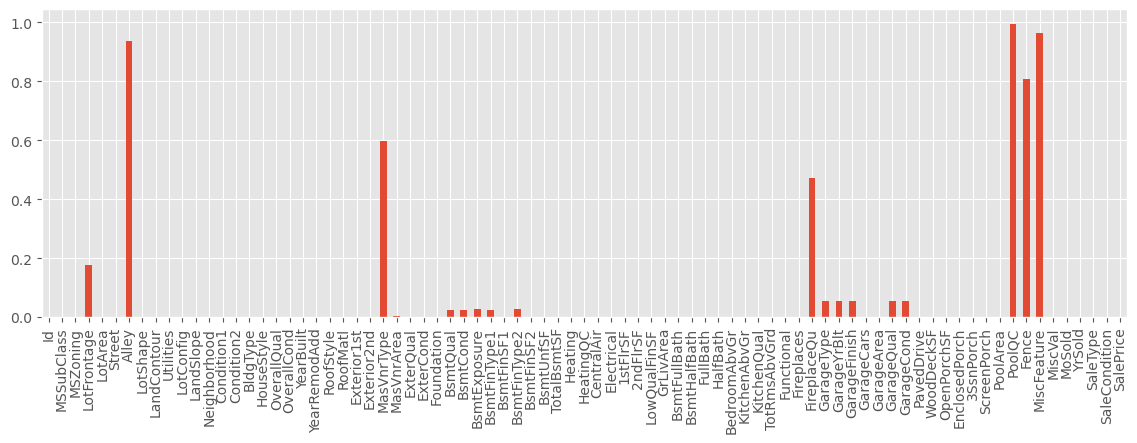

In [10]:
df.isna().mean().plot.bar(figsize=(14,4))

# Check Cardinality

In [11]:
for col in cat_var:
    print('labels por variável: ' + col + ' ' + str(df[col].nunique()))

labels por variável: MSZoning 5
labels por variável: Street 2
labels por variável: Alley 2
labels por variável: LotShape 4
labels por variável: LandContour 4
labels por variável: Utilities 2
labels por variável: LotConfig 5
labels por variável: LandSlope 3
labels por variável: Neighborhood 25
labels por variável: Condition1 9
labels por variável: Condition2 8
labels por variável: BldgType 5
labels por variável: HouseStyle 8
labels por variável: RoofStyle 6
labels por variável: RoofMatl 8
labels por variável: Exterior1st 15
labels por variável: Exterior2nd 16
labels por variável: MasVnrType 3
labels por variável: ExterQual 4
labels por variável: ExterCond 5
labels por variável: Foundation 6
labels por variável: BsmtQual 4
labels por variável: BsmtCond 4
labels por variável: BsmtExposure 4
labels por variável: BsmtFinType1 6
labels por variável: BsmtFinType2 6
labels por variável: Heating 6
labels por variável: HeatingQC 5
labels por variável: CentralAir 2
labels por variável: Electrical

In [12]:
for col in num_var:
    print('Numero de labels por variável na coluna: ' + col + ' ' + str(df[col].nunique()))

Numero de labels por variável na coluna: Id 1460
Numero de labels por variável na coluna: MSSubClass 15
Numero de labels por variável na coluna: LotFrontage 110
Numero de labels por variável na coluna: LotArea 1073
Numero de labels por variável na coluna: OverallQual 10
Numero de labels por variável na coluna: OverallCond 9
Numero de labels por variável na coluna: YearBuilt 112
Numero de labels por variável na coluna: YearRemodAdd 61
Numero de labels por variável na coluna: MasVnrArea 327
Numero de labels por variável na coluna: BsmtFinSF1 637
Numero de labels por variável na coluna: BsmtFinSF2 144
Numero de labels por variável na coluna: BsmtUnfSF 780
Numero de labels por variável na coluna: TotalBsmtSF 721
Numero de labels por variável na coluna: 1stFlrSF 753
Numero de labels por variável na coluna: 2ndFlrSF 417
Numero de labels por variável na coluna: LowQualFinSF 24
Numero de labels por variável na coluna: GrLivArea 861
Numero de labels por variável na coluna: BsmtFullBath 4
Numero

# Drop constant features

# nao tem variável constante

In [13]:
# renew dtype
num_var = df.select_dtypes(include=['number']).columns
cat_var = df.select_dtypes(include=['object', 'category', 'bool']).columns

- log : MSSubClass

In [21]:
df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

# Graphs

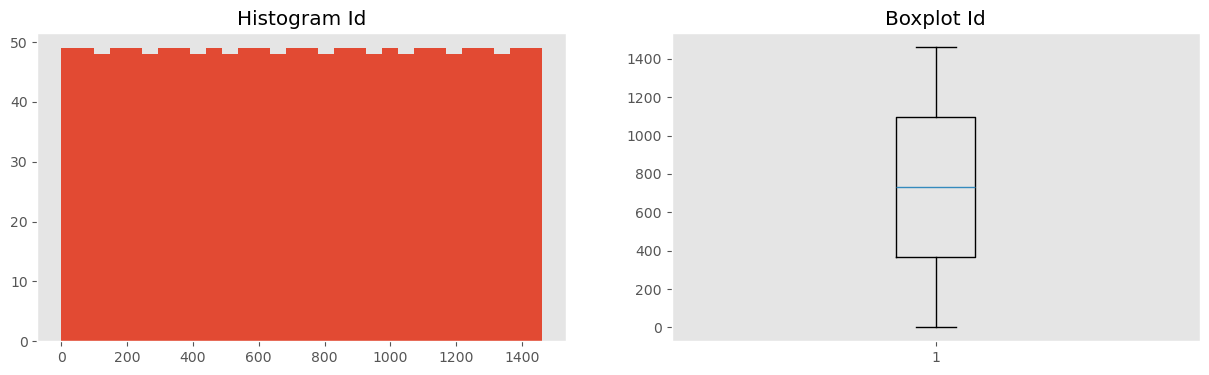

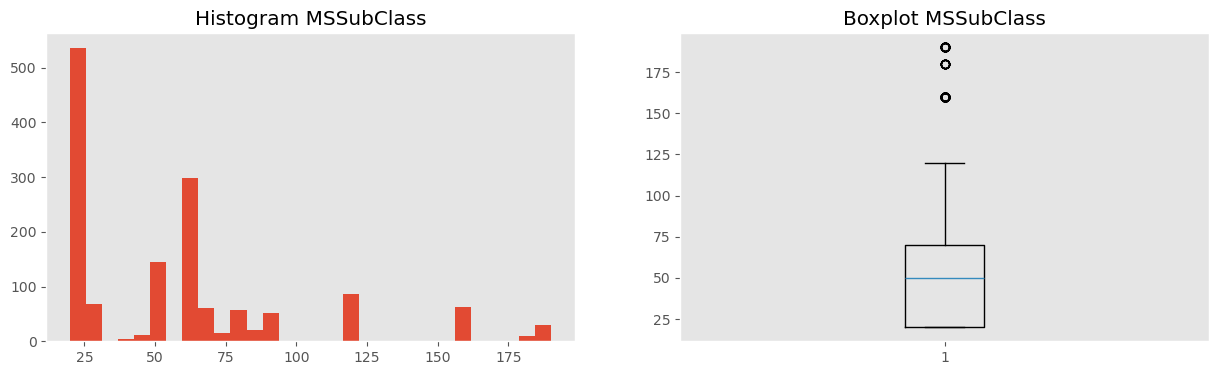

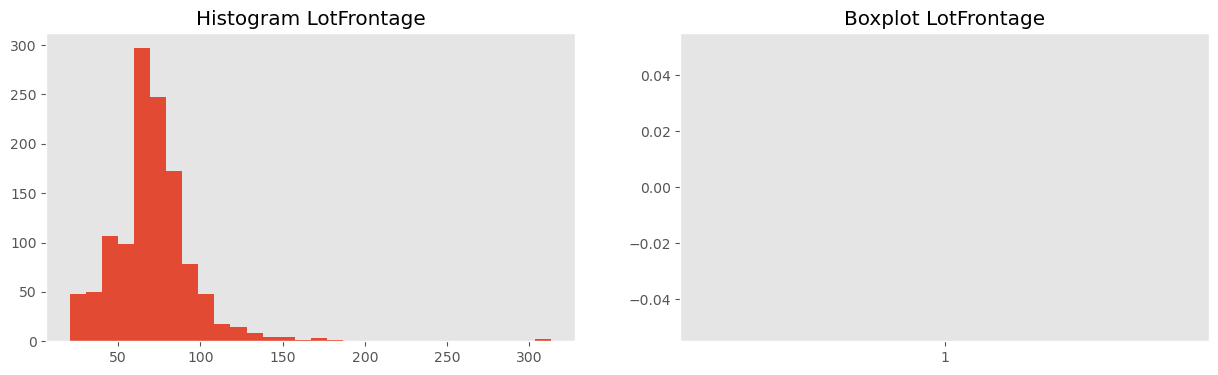

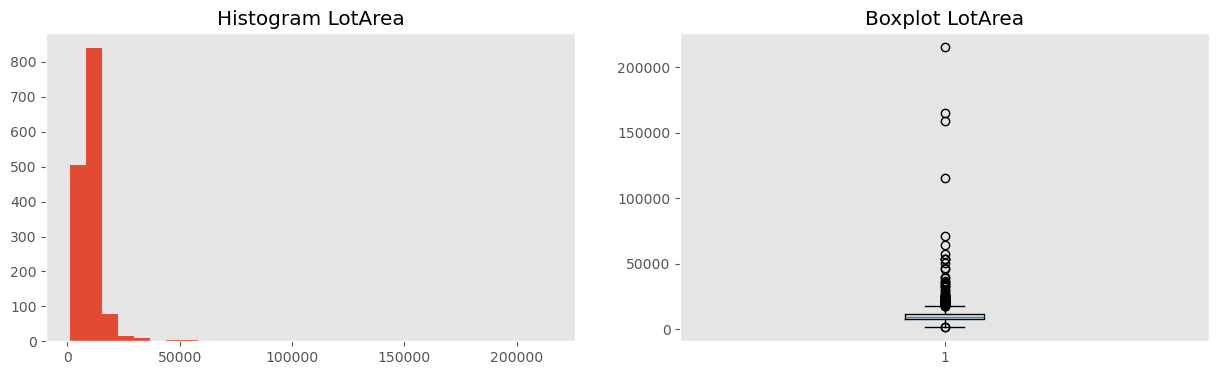

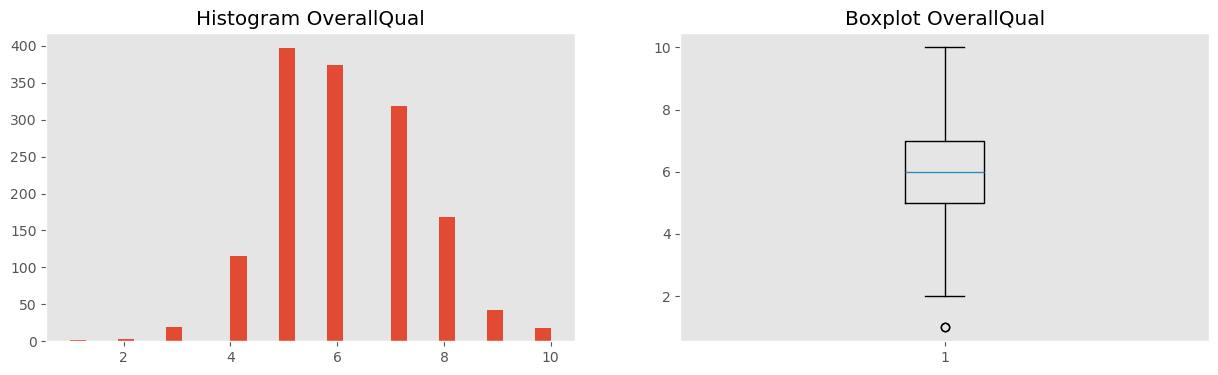

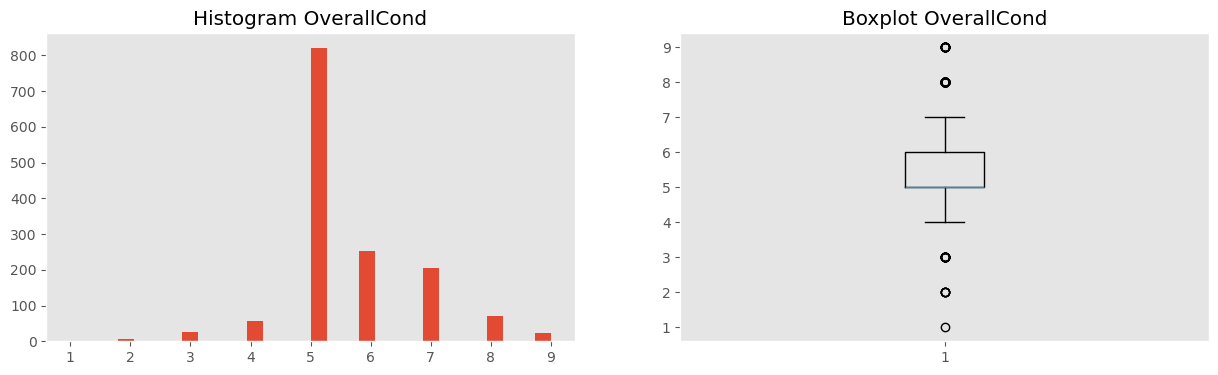

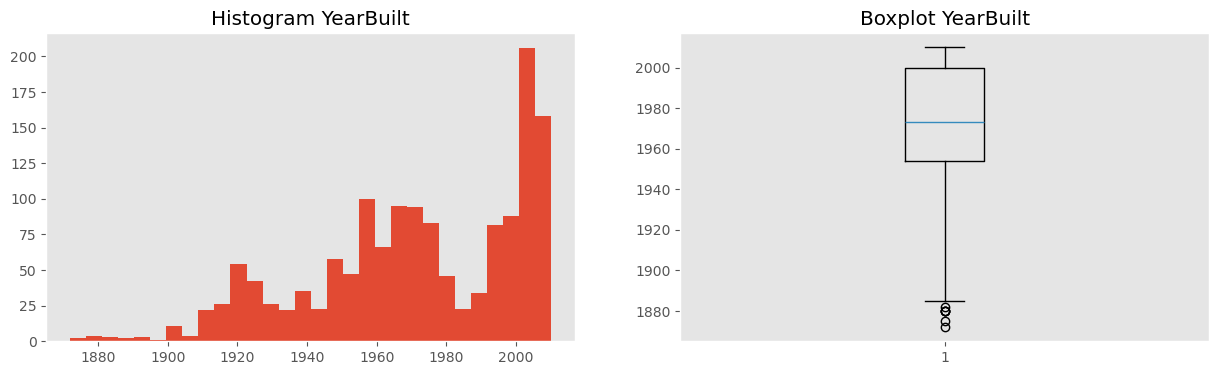

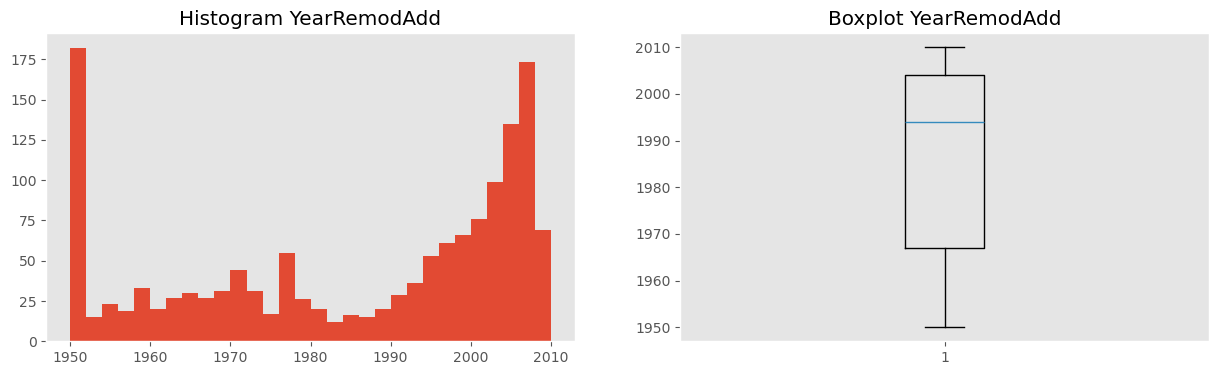

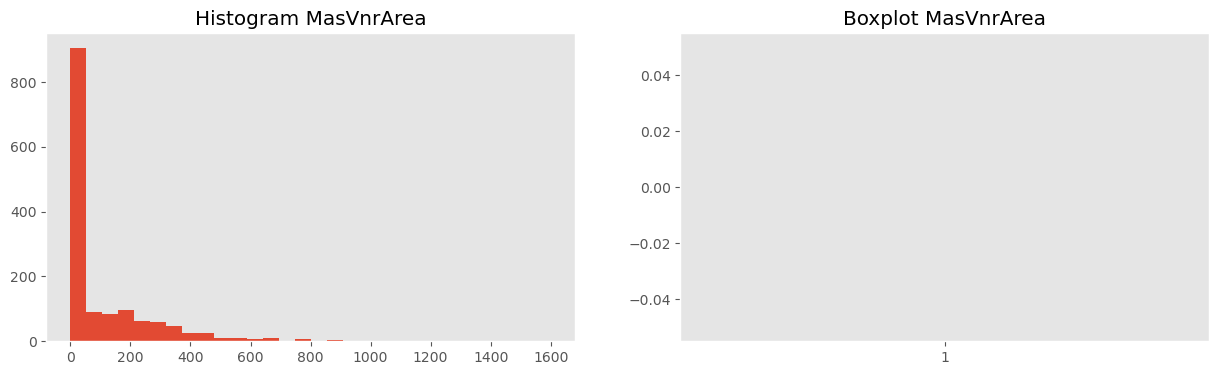

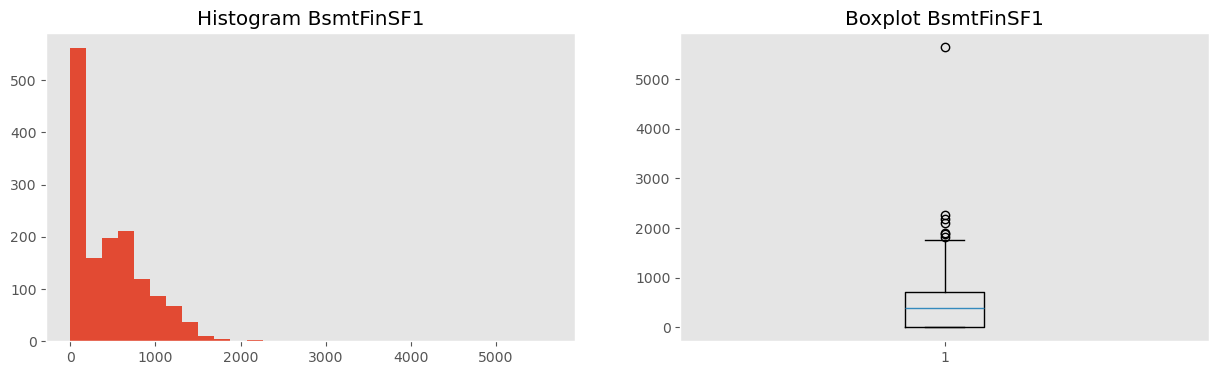

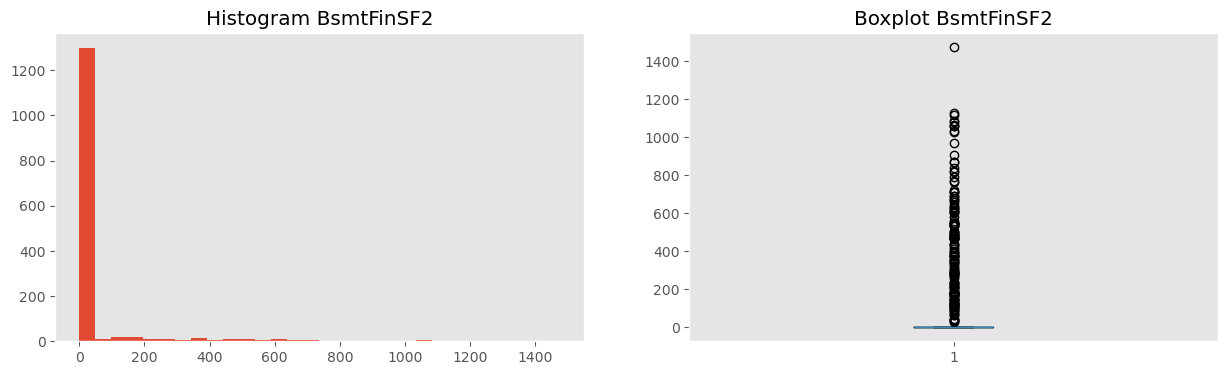

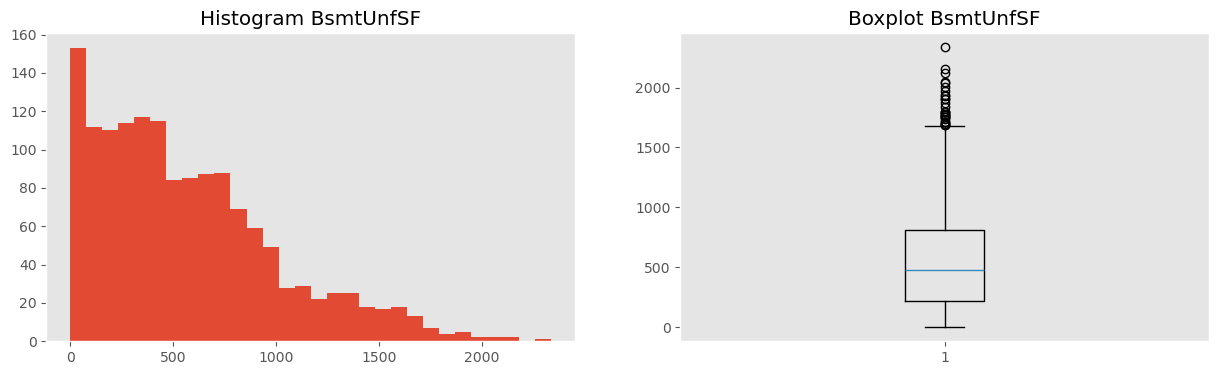

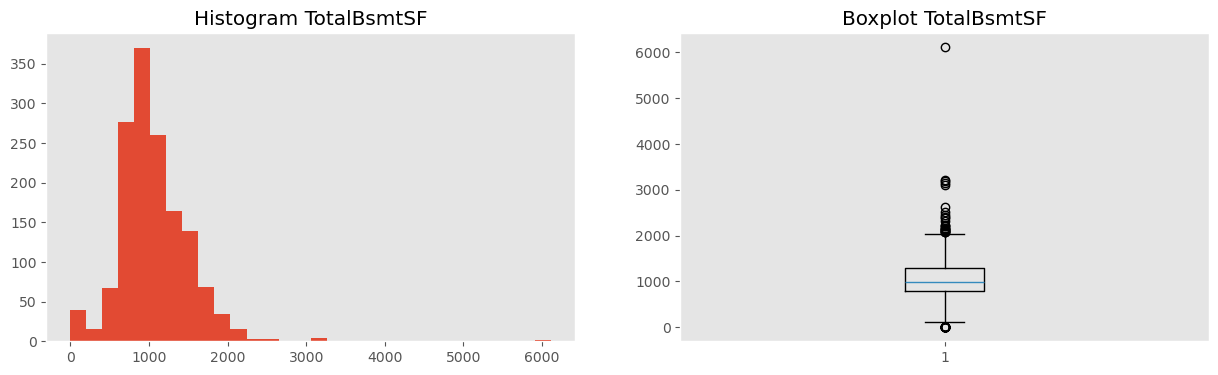

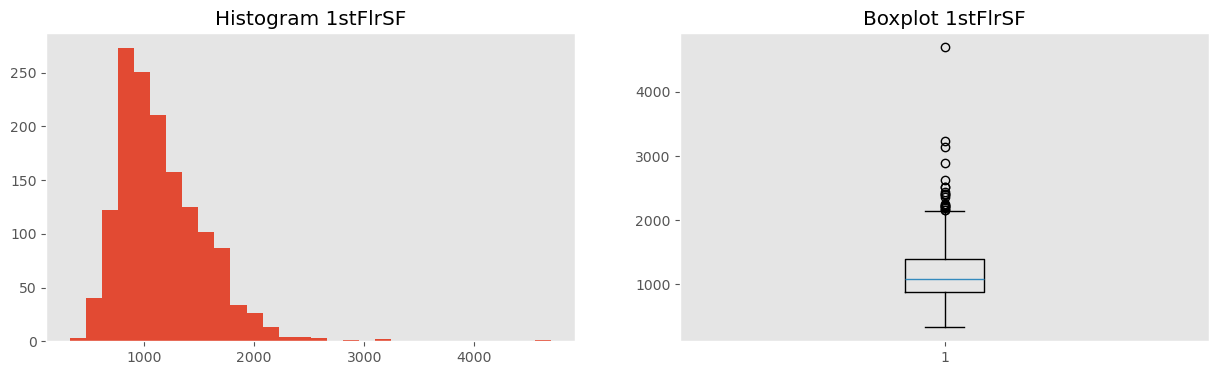

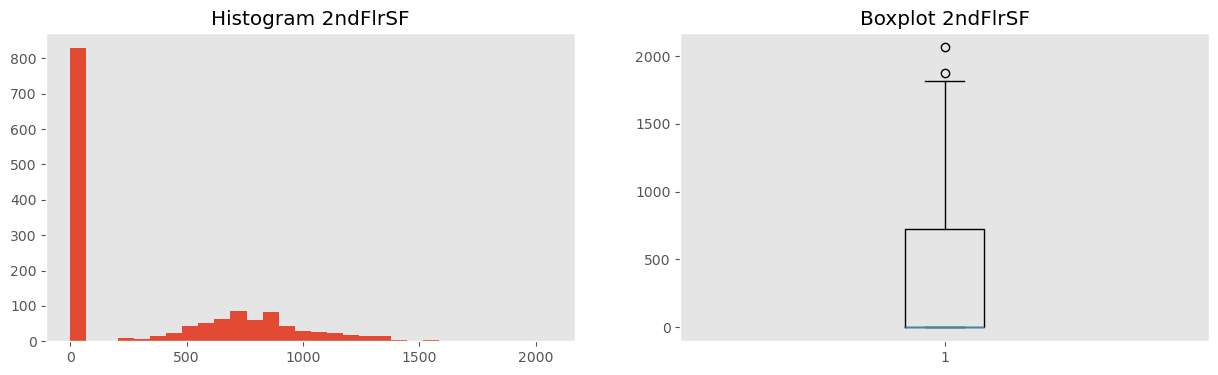

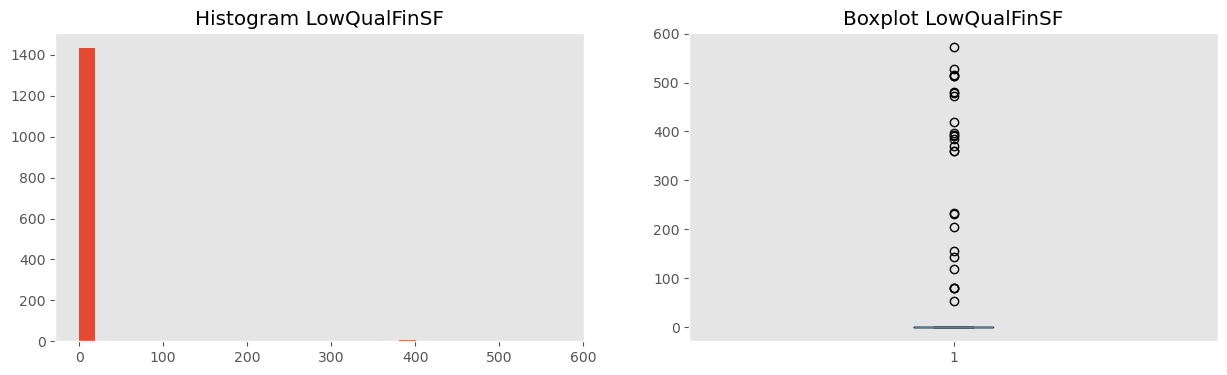

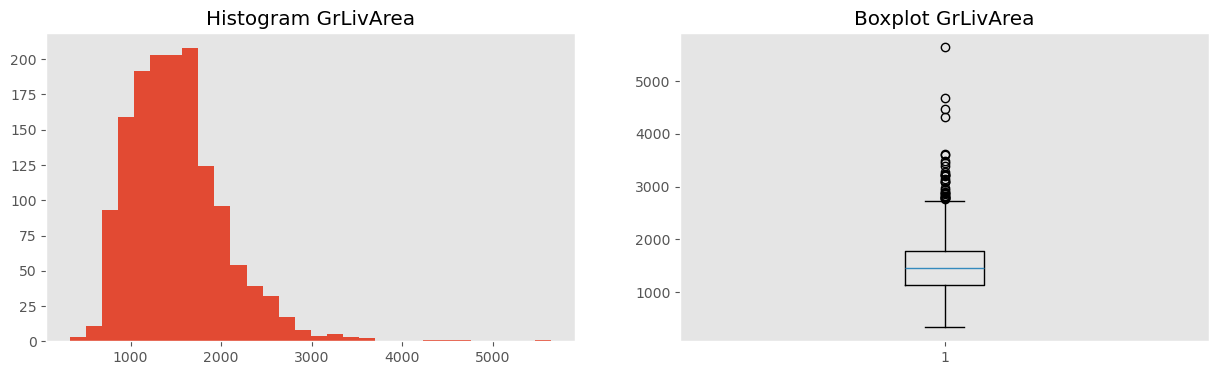

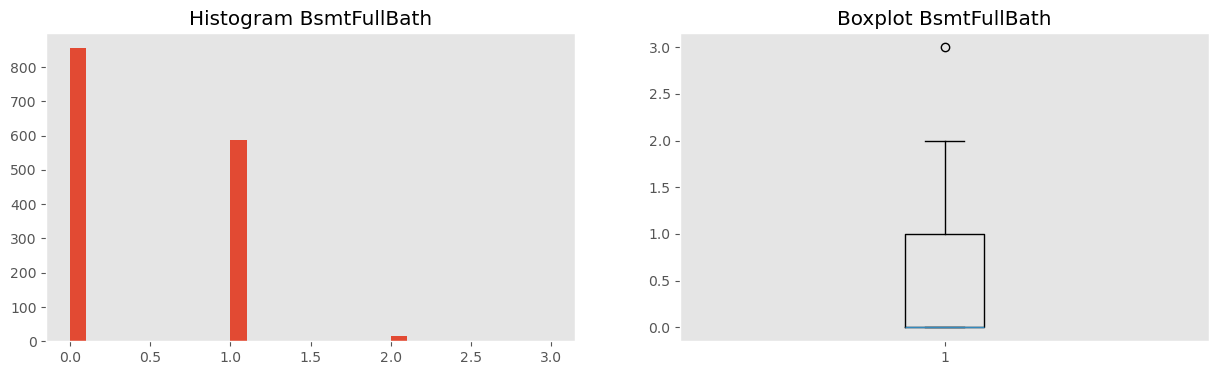

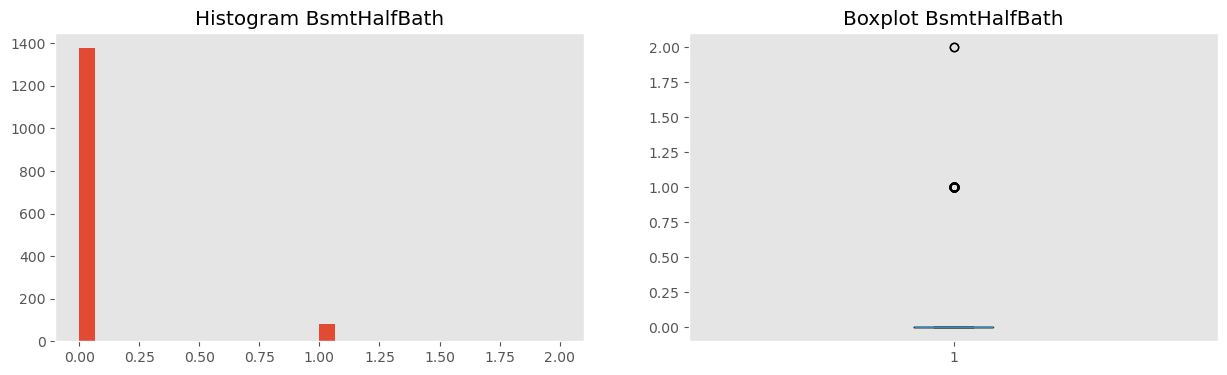

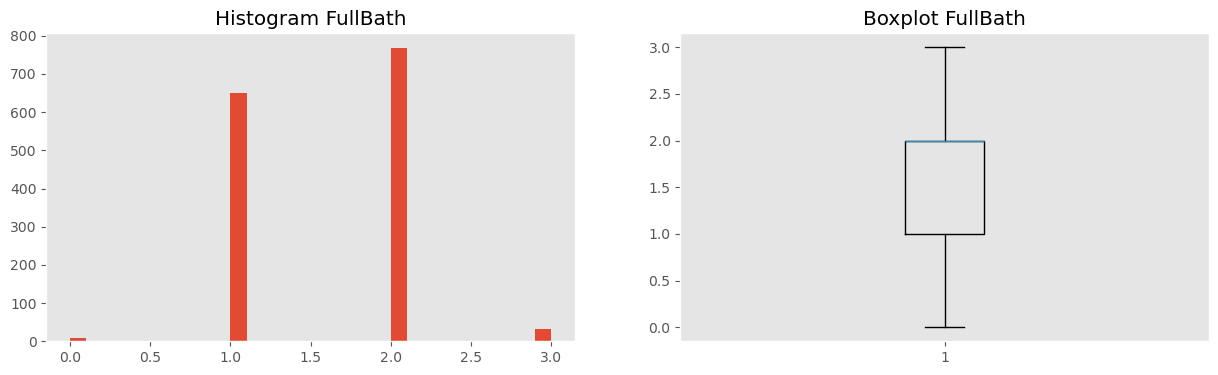

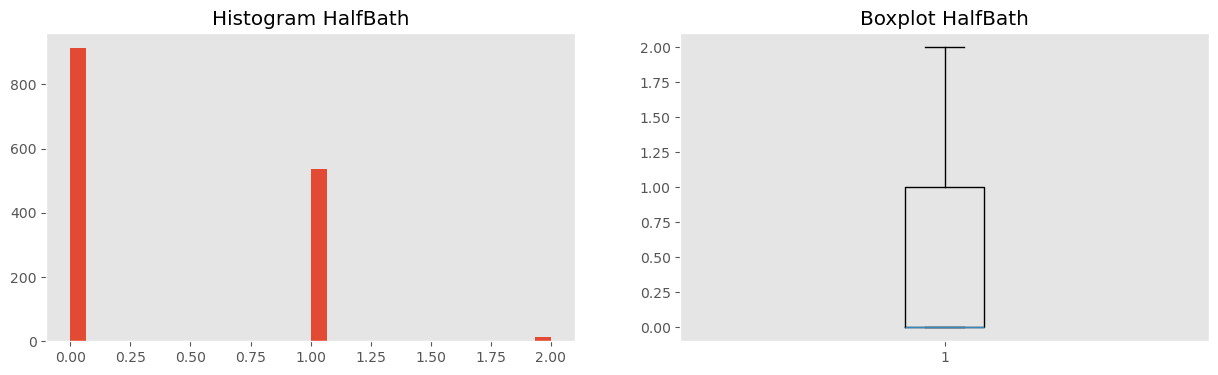

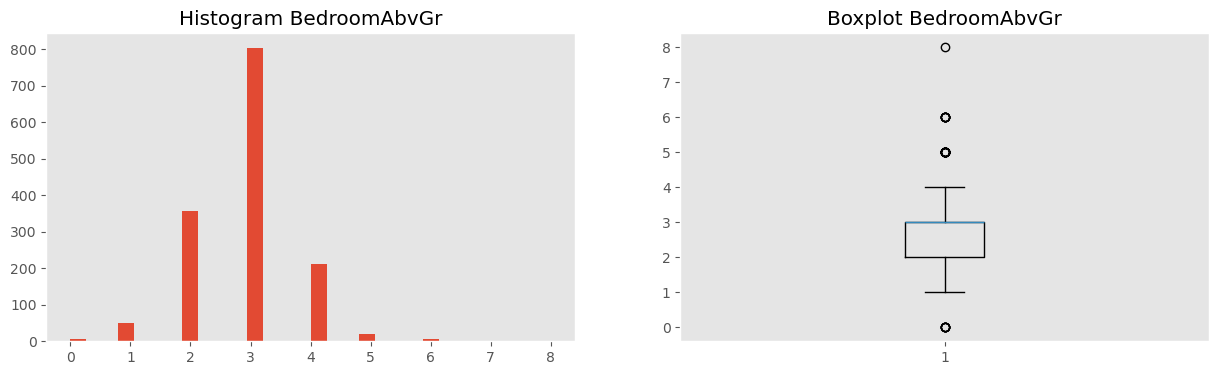

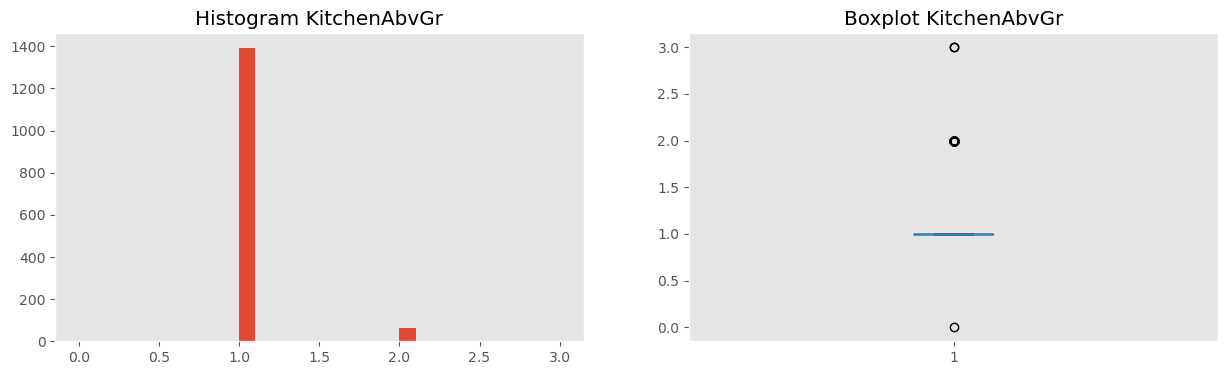

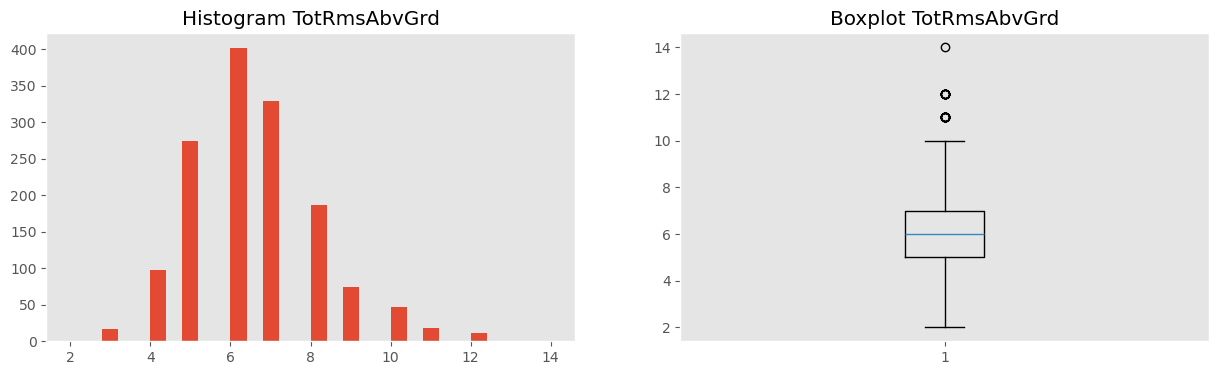

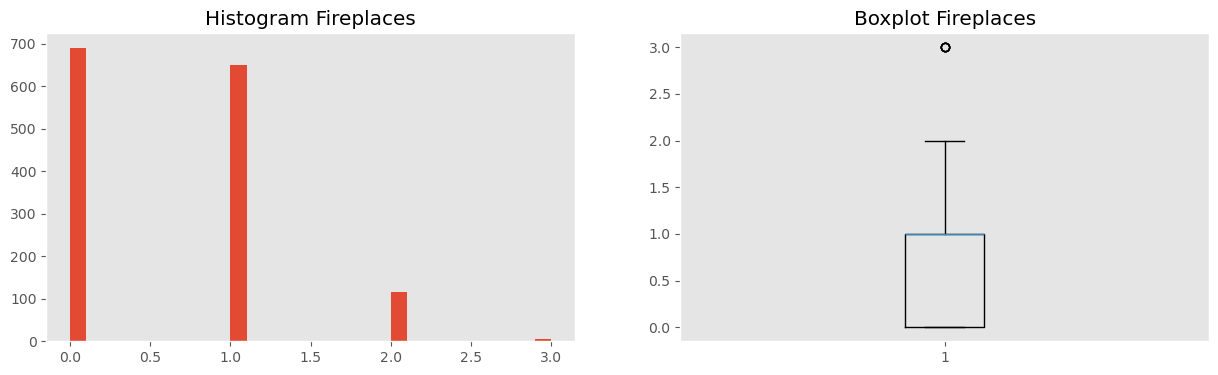

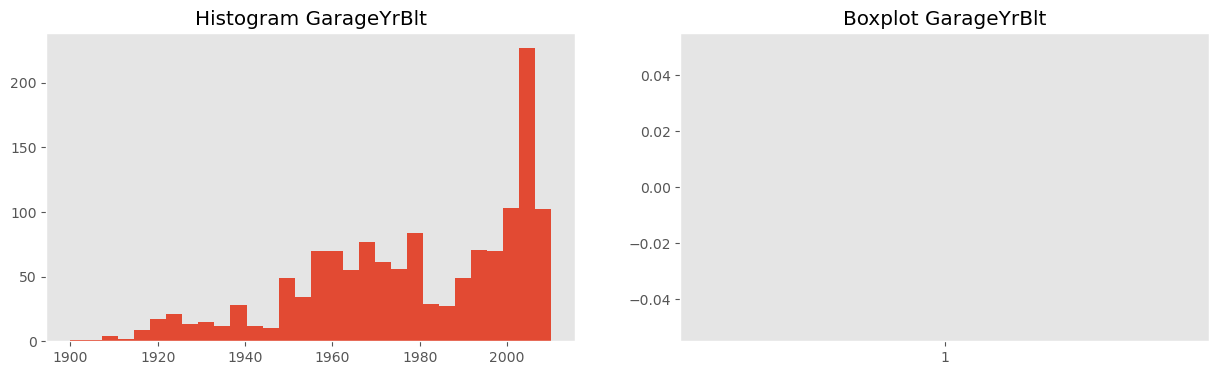

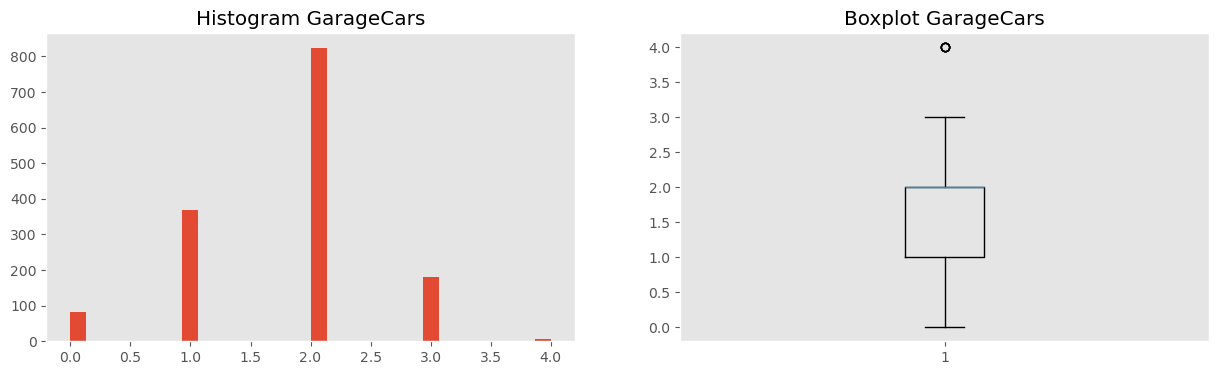

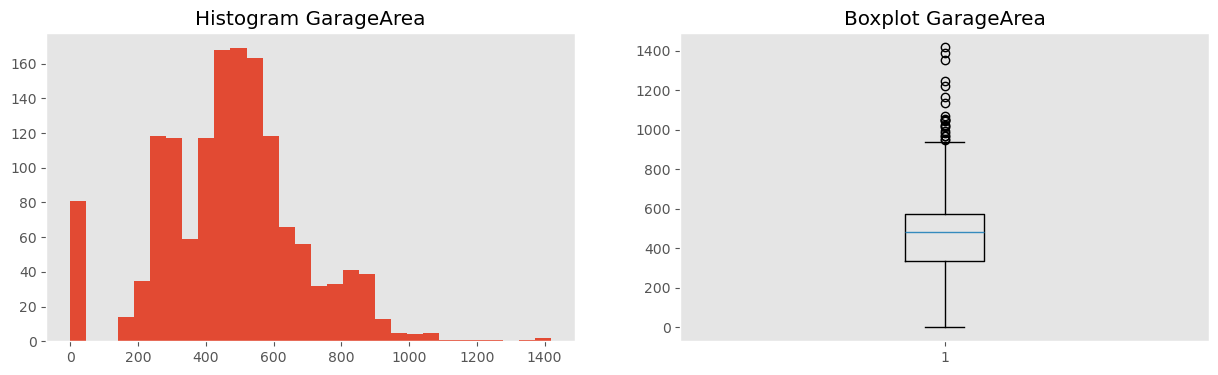

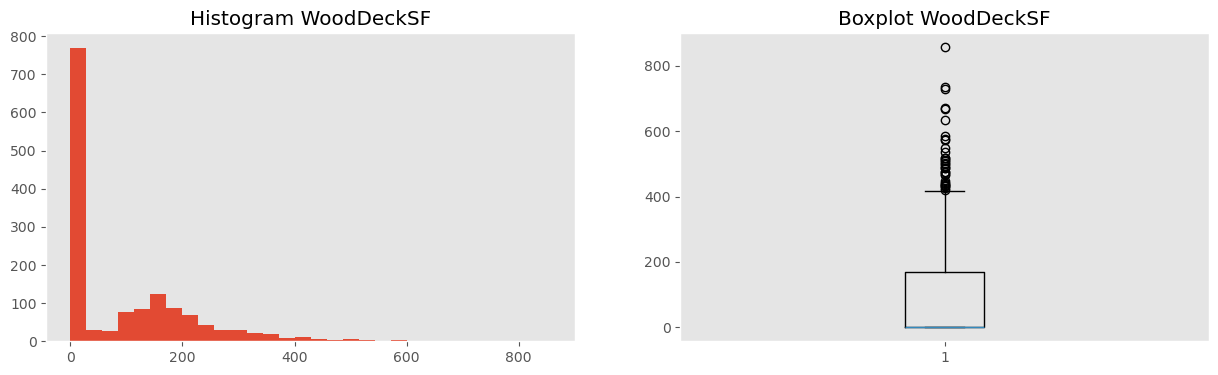

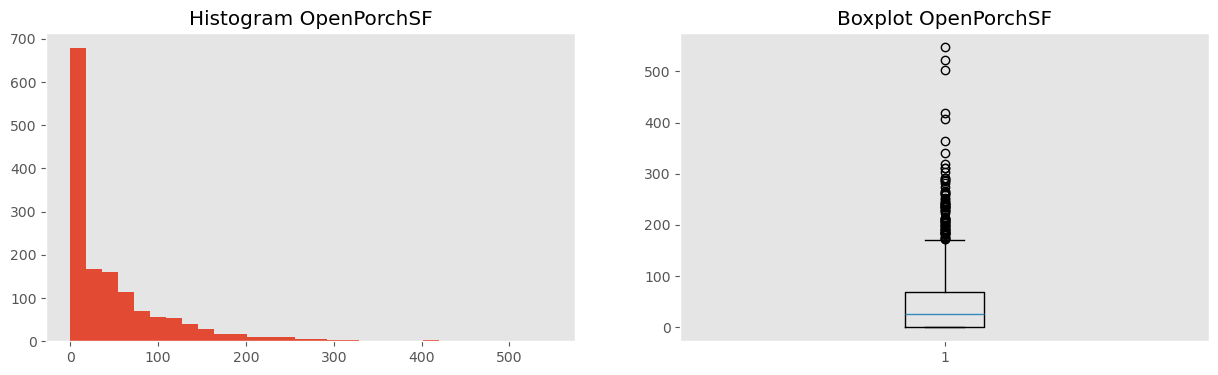

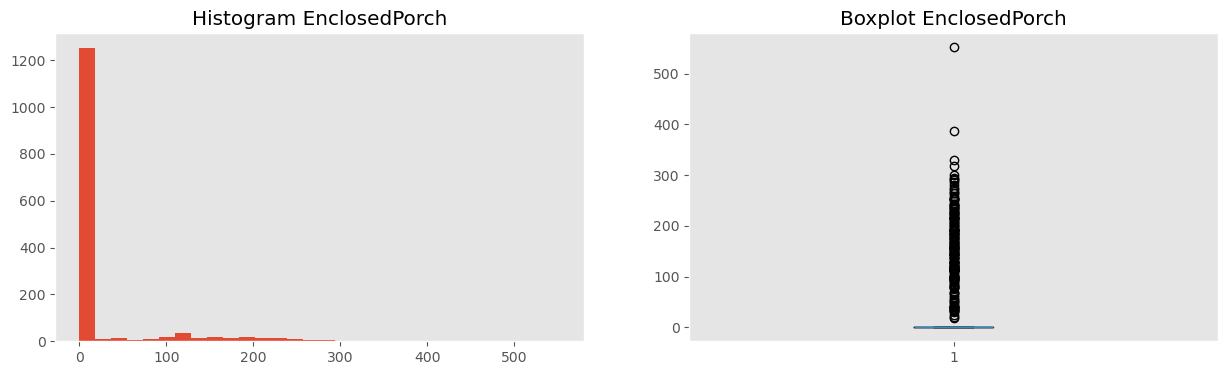

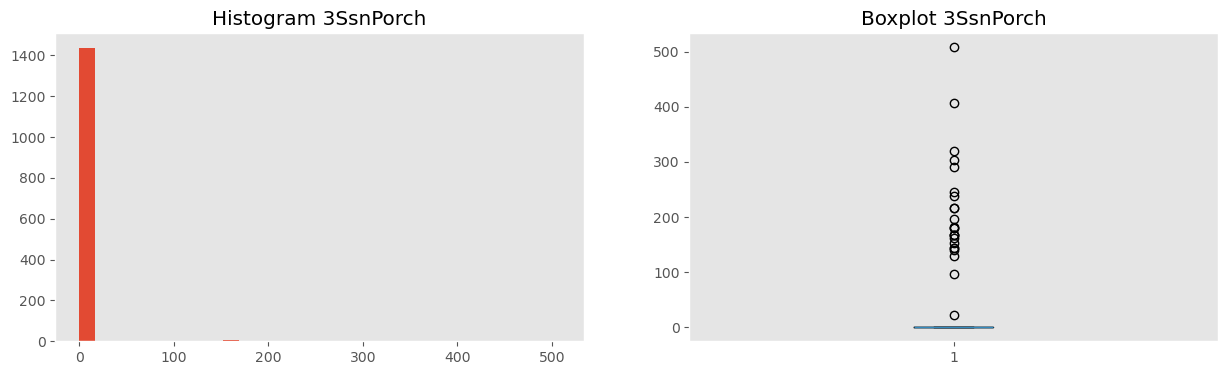

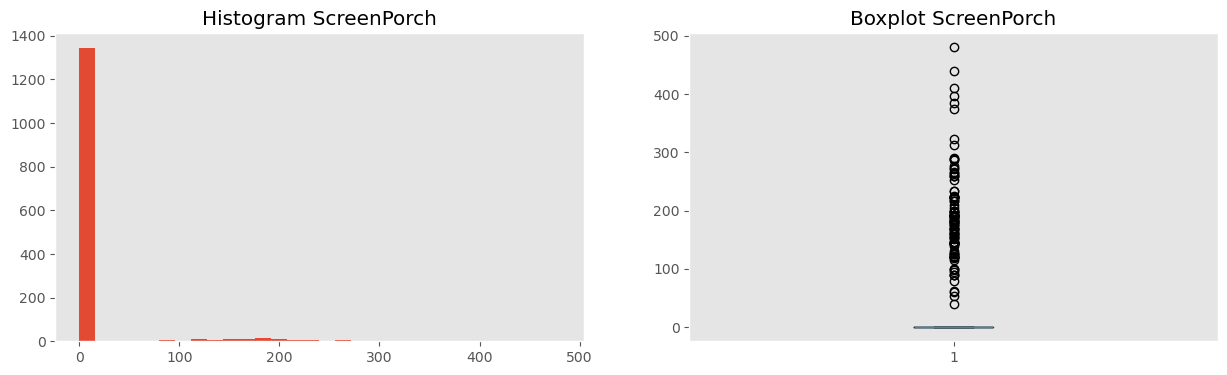

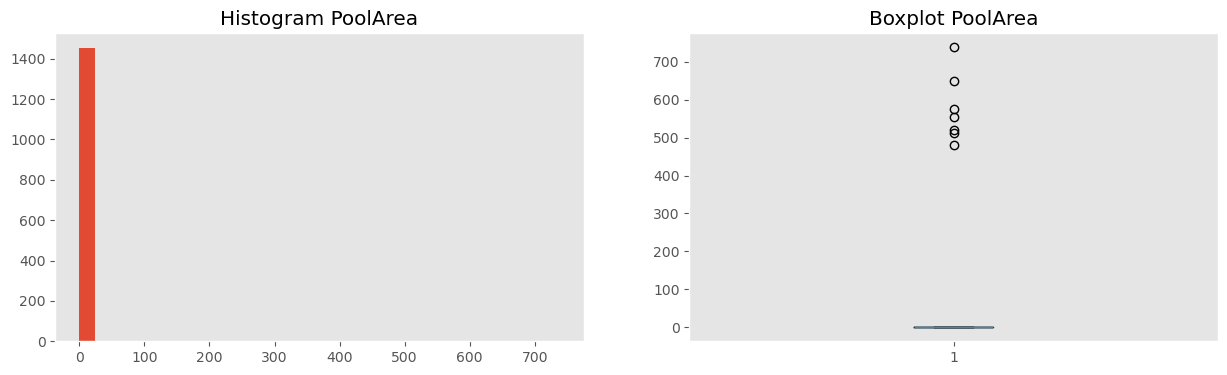

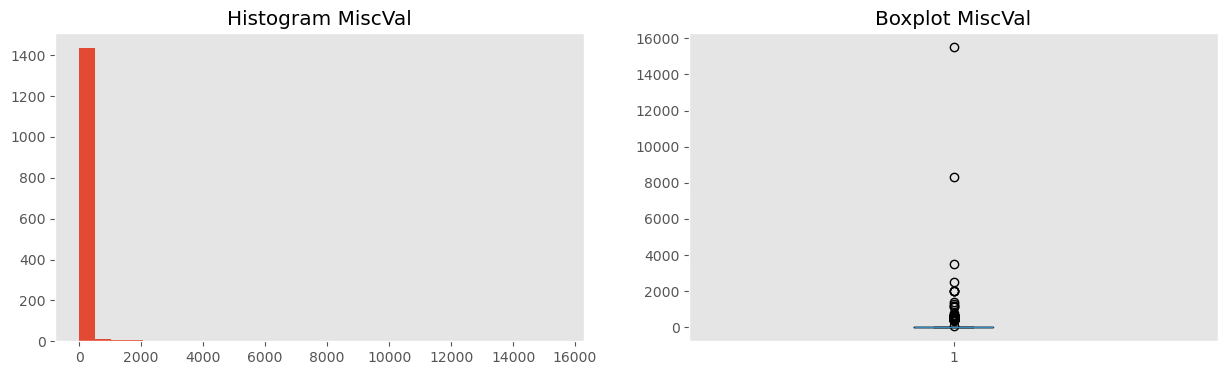

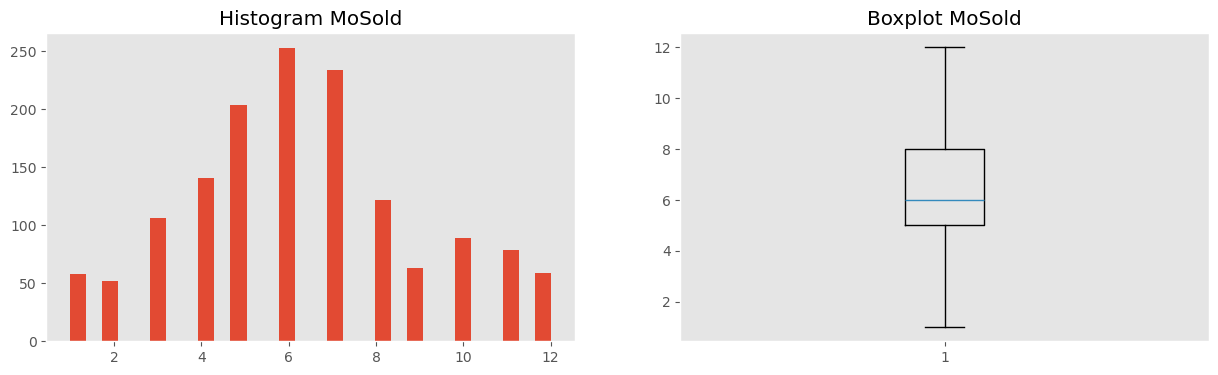

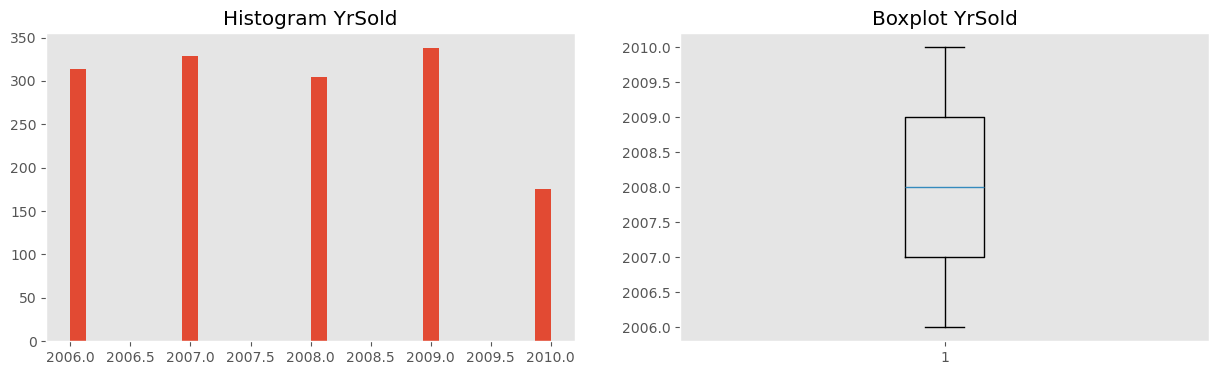

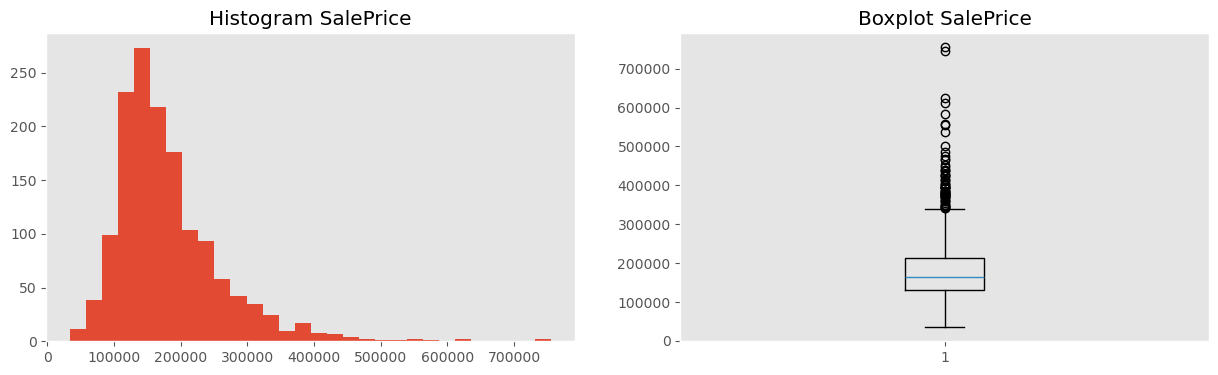

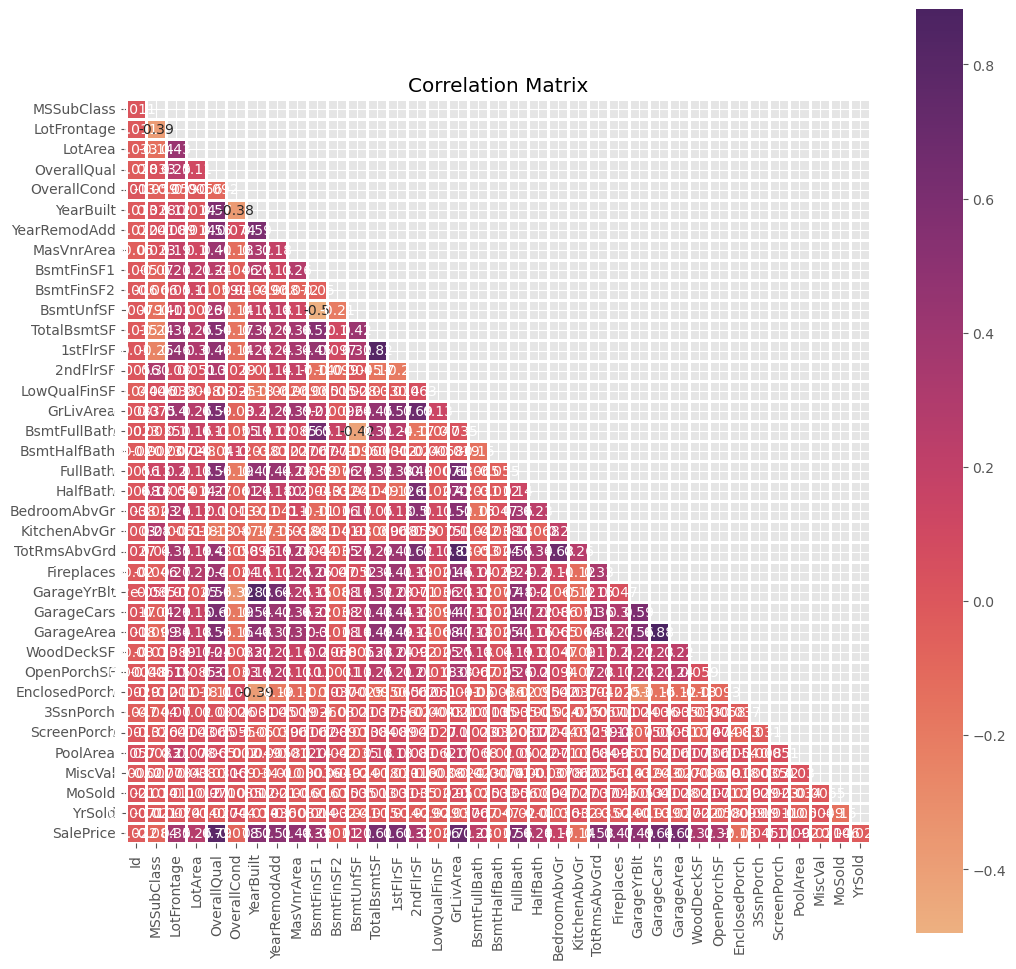

In [14]:
plot_numerical_data(df, target='SalePrice', classification=False)

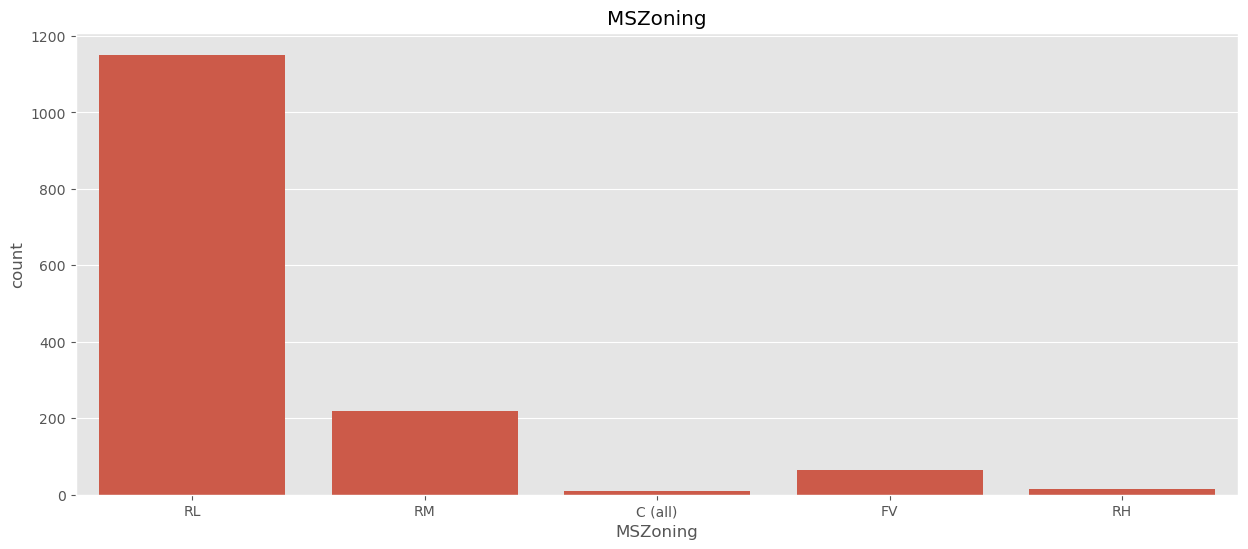

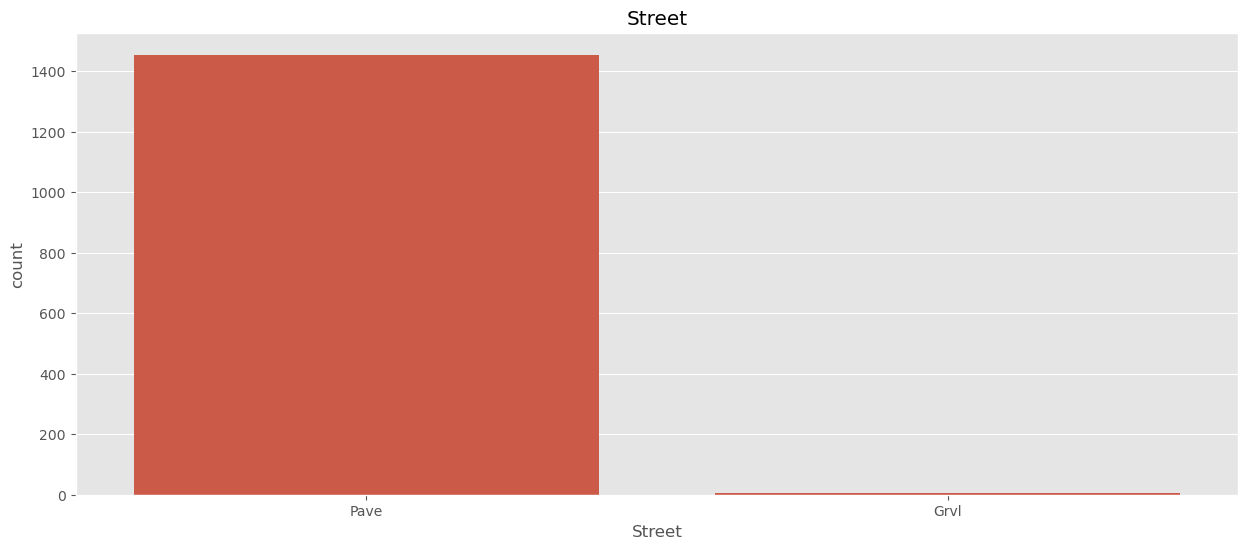

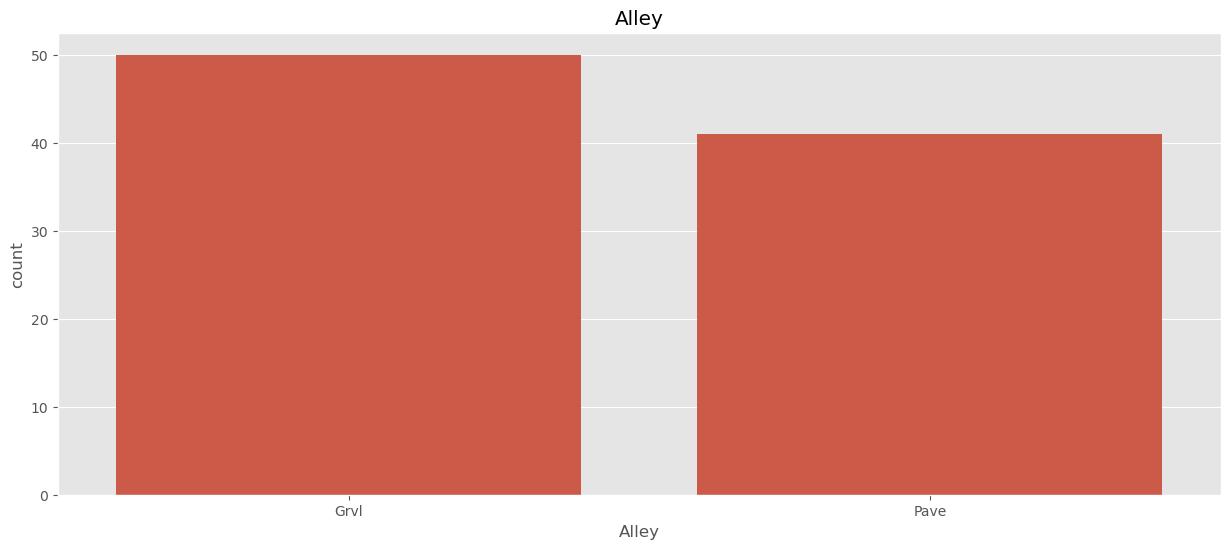

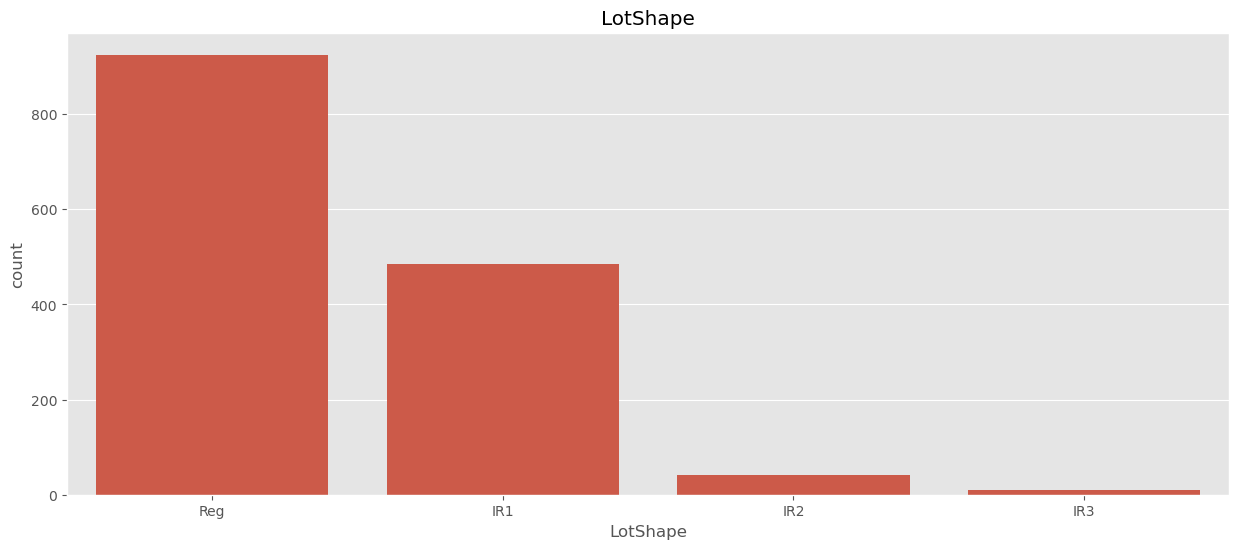

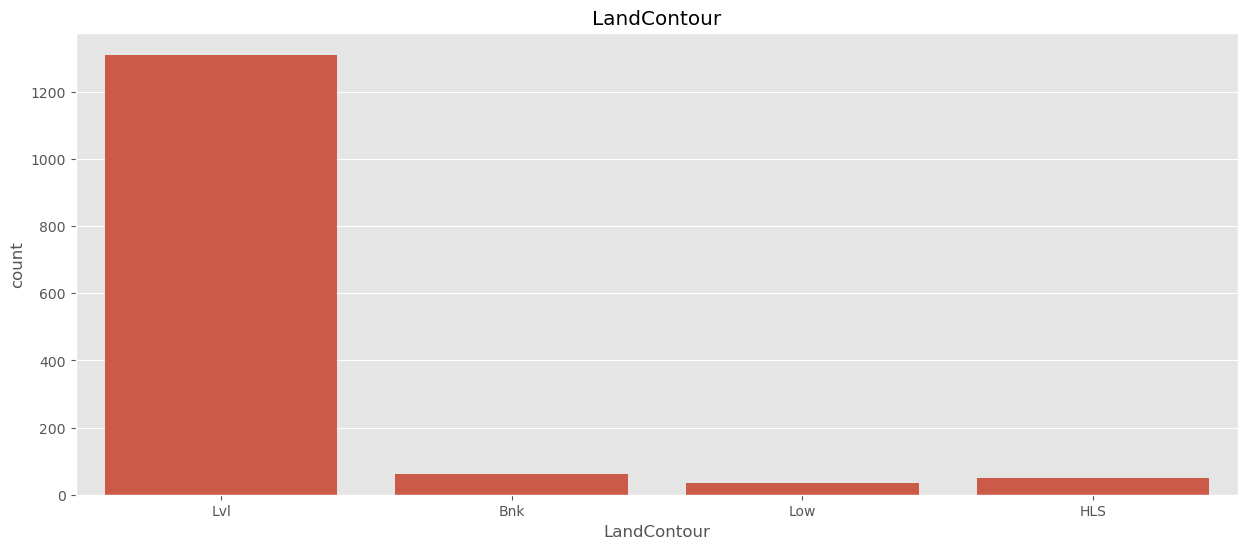

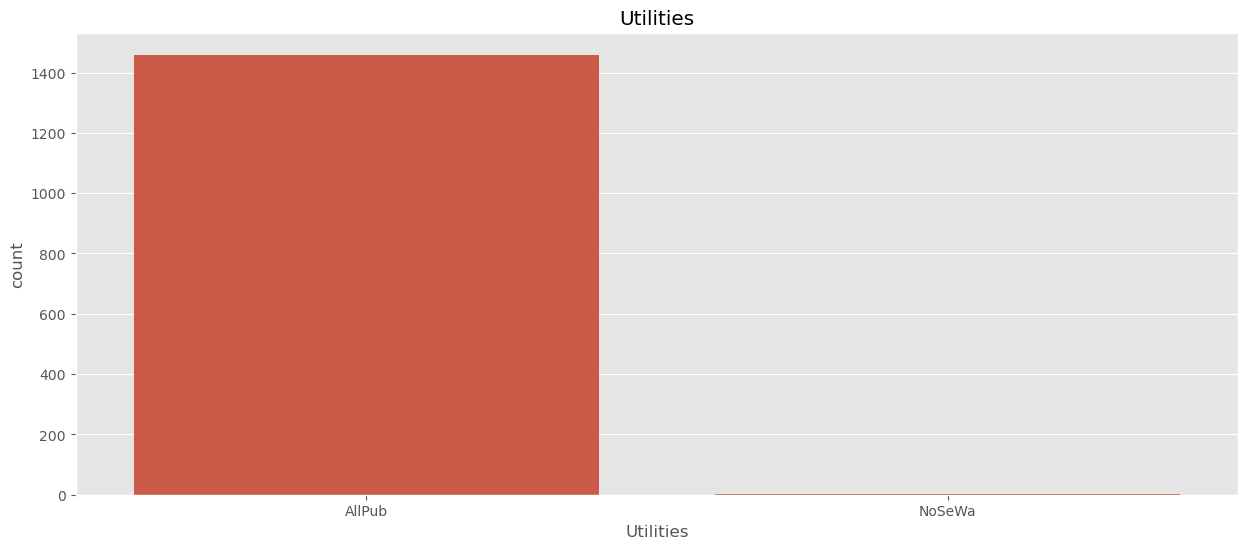

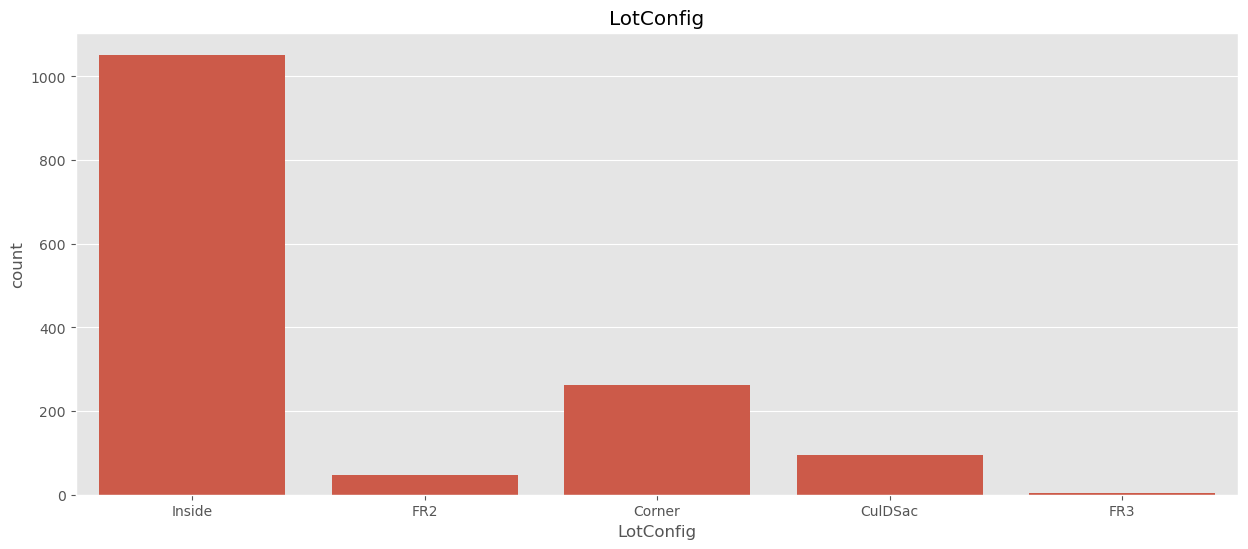

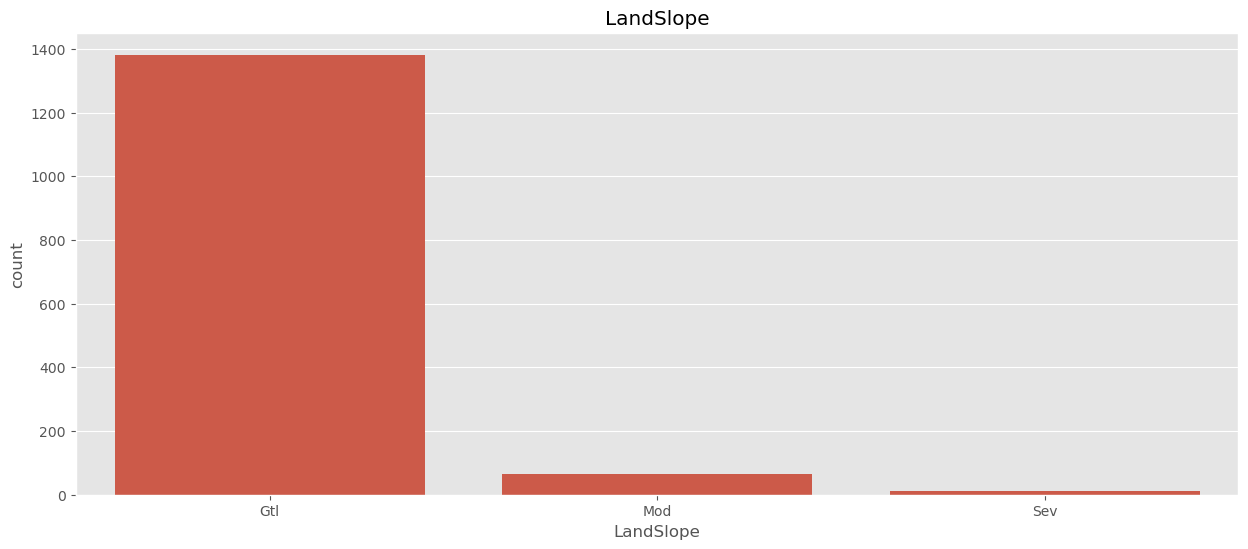

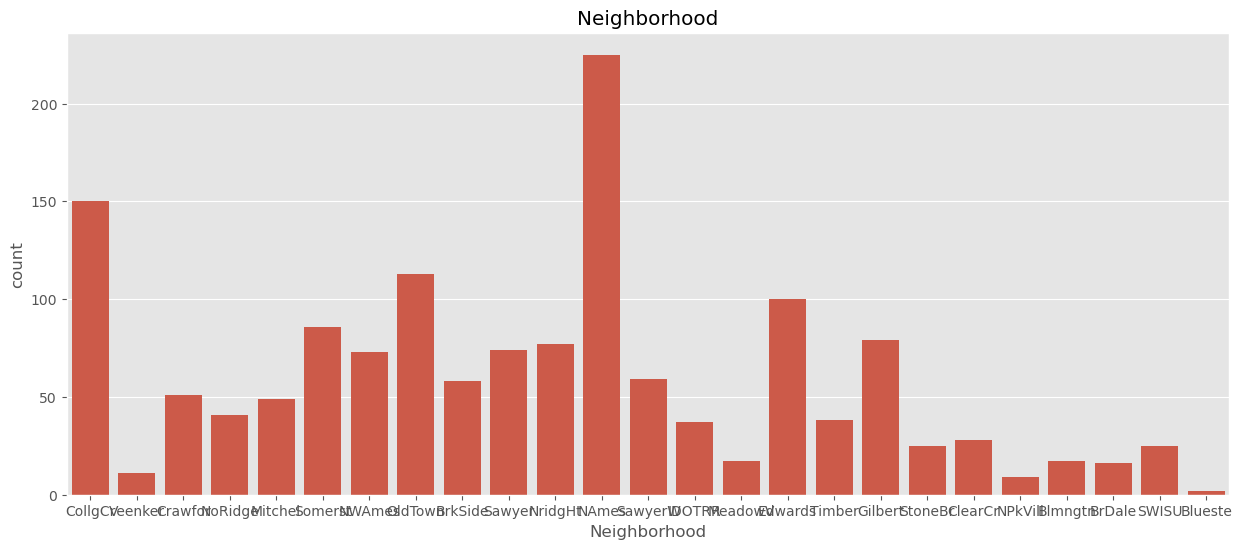

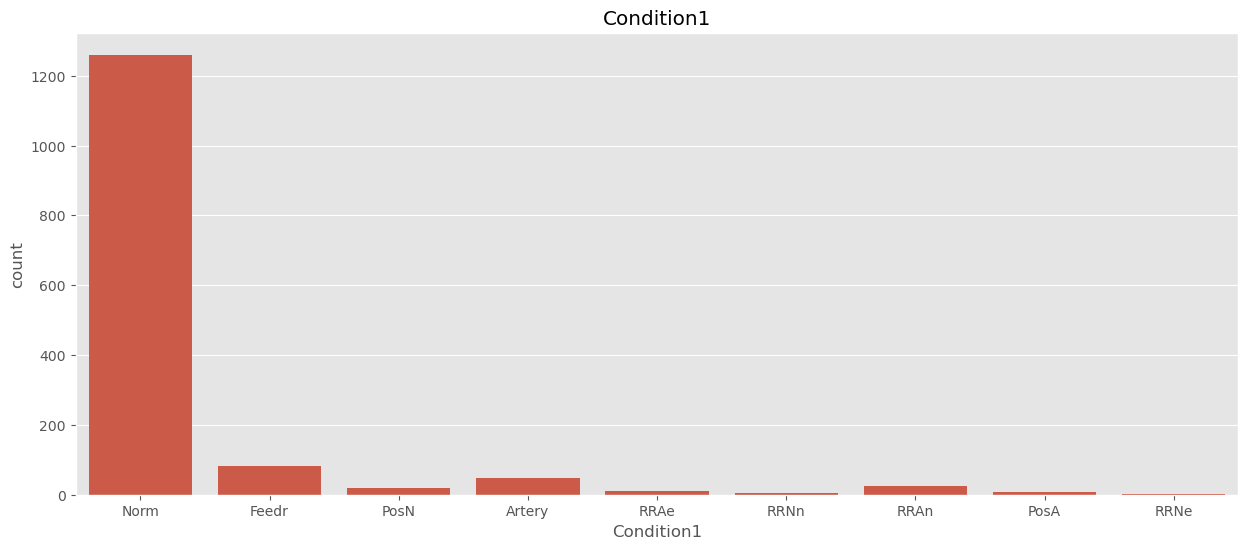

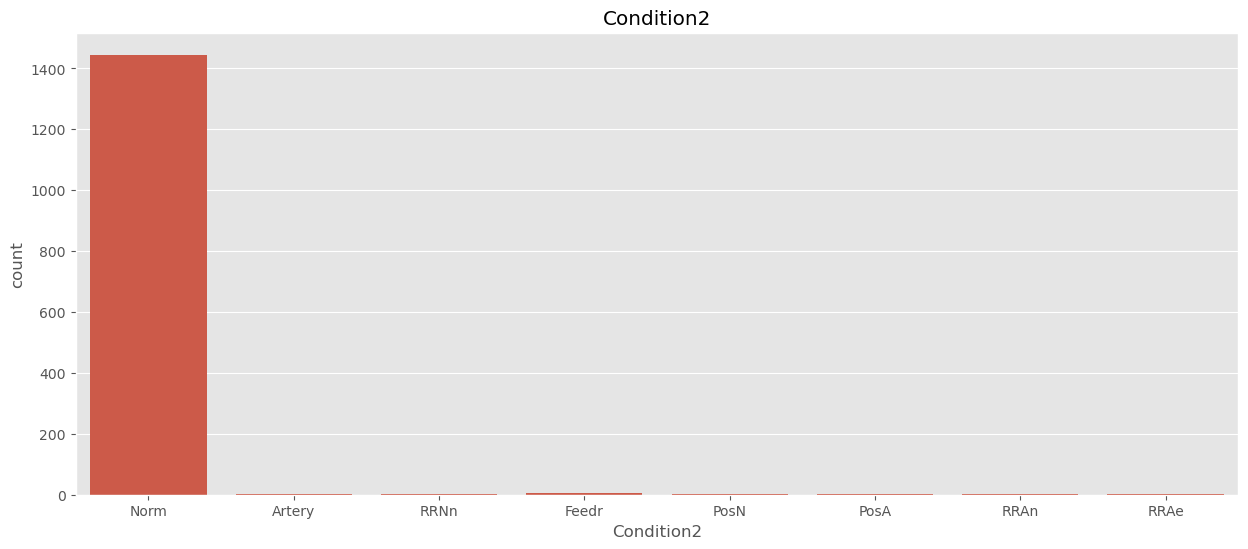

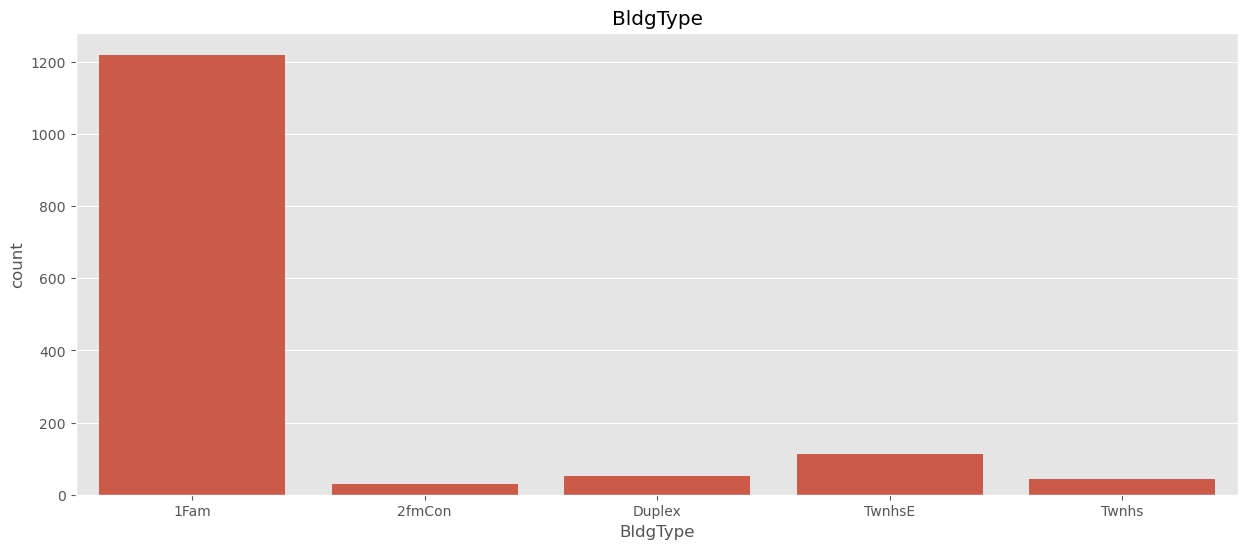

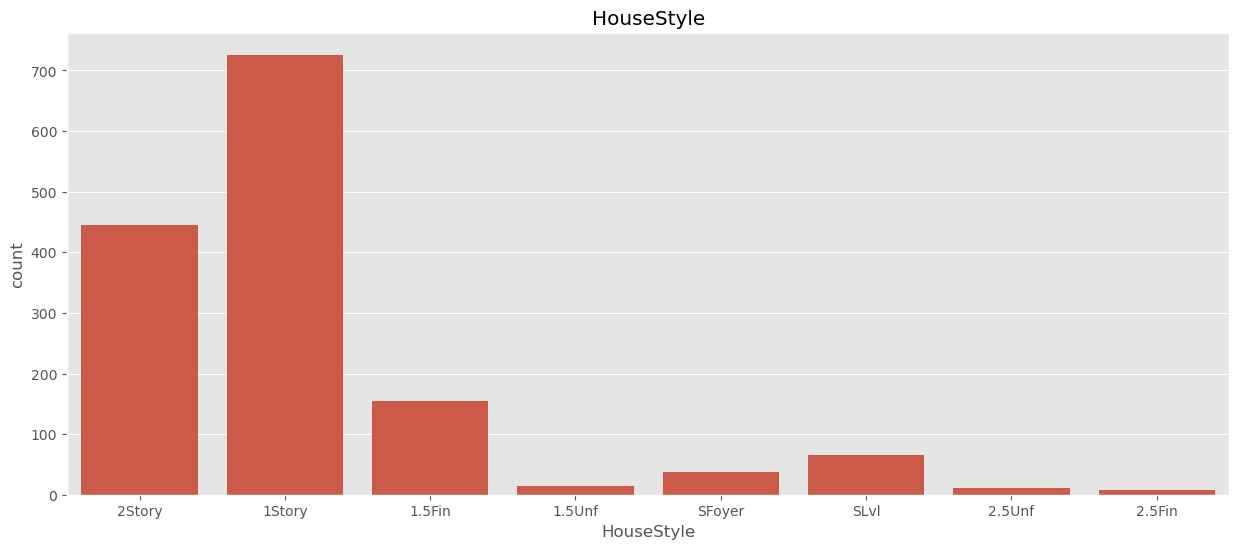

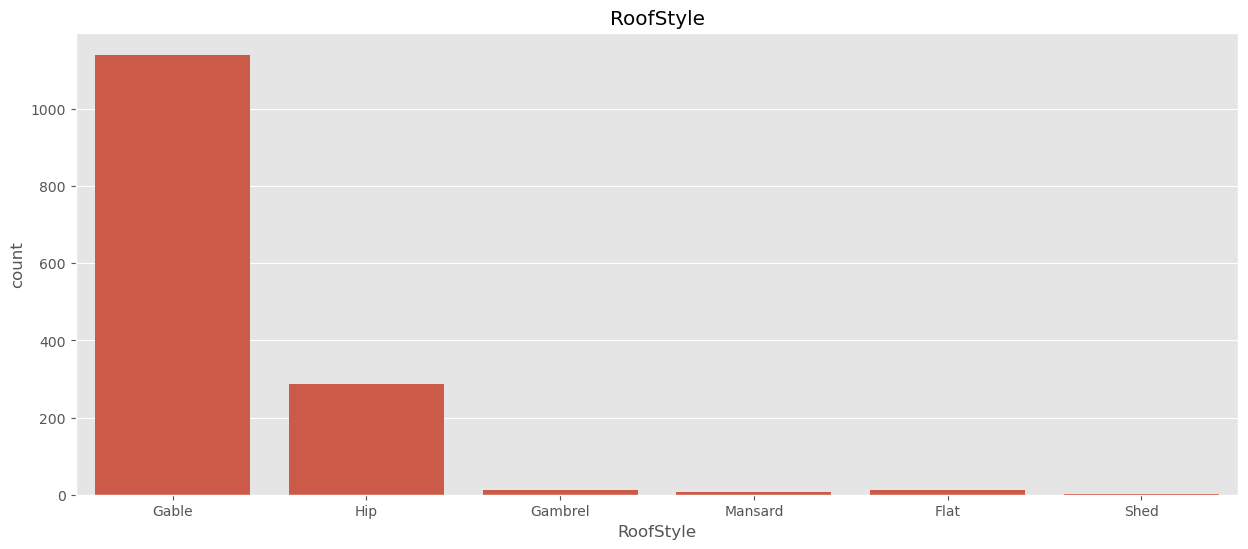

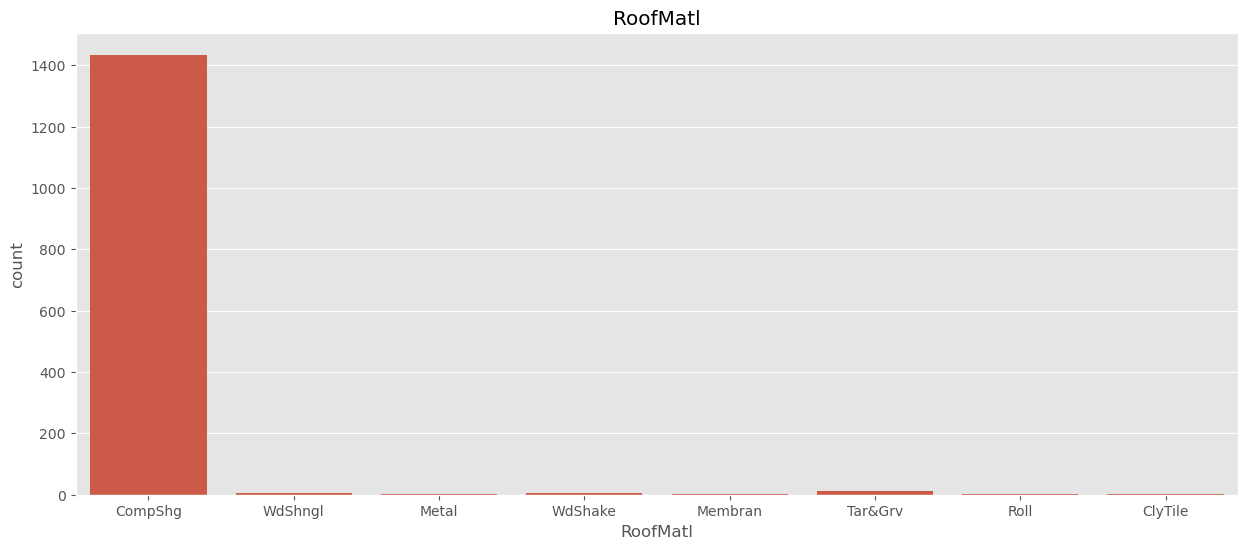

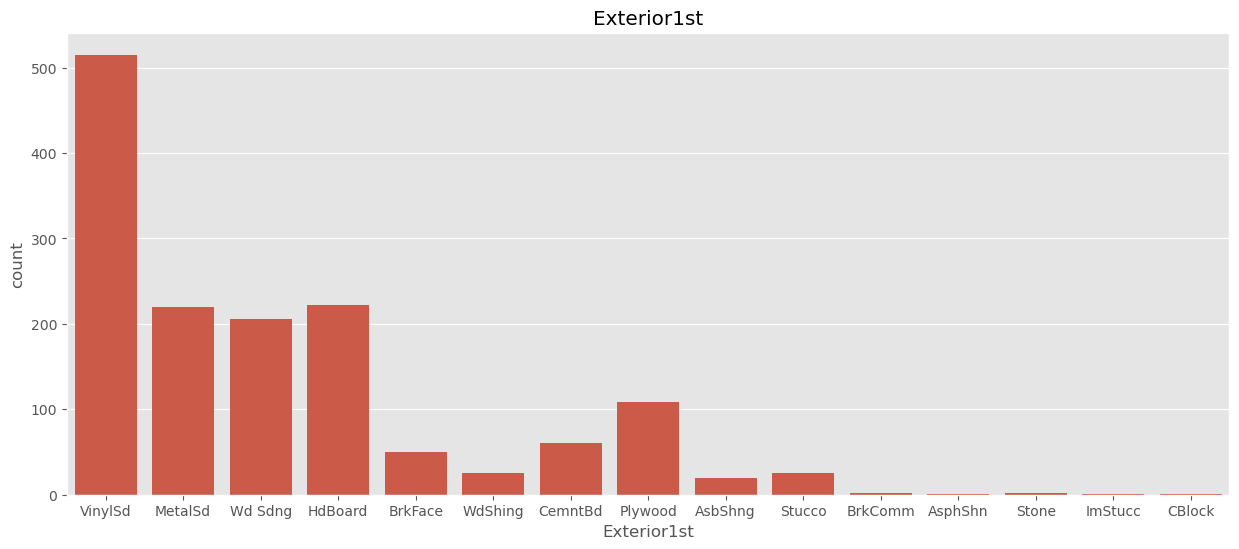

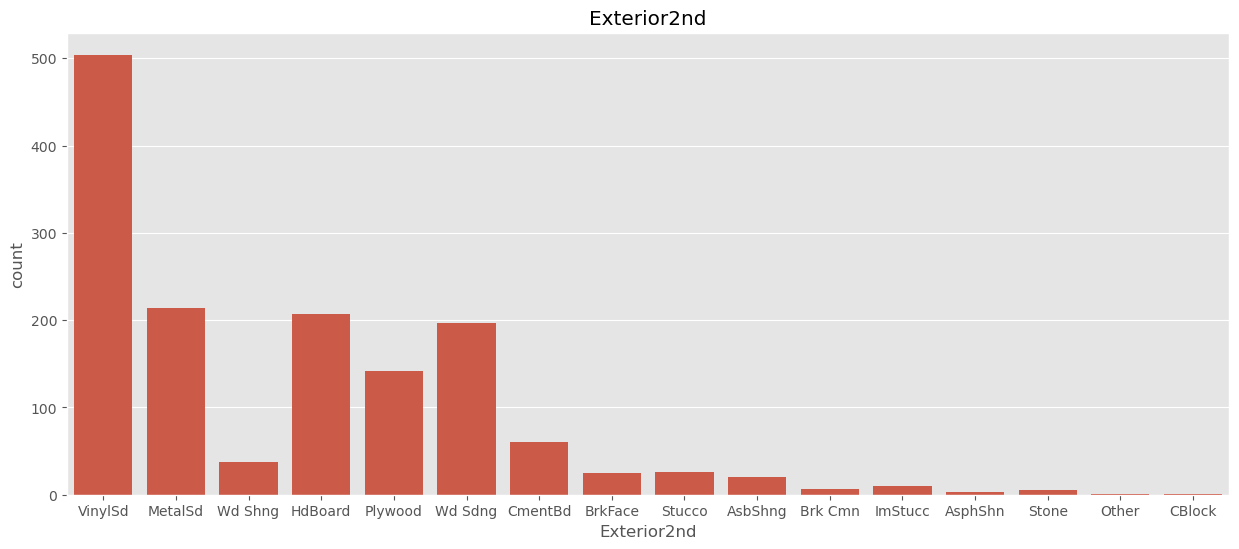

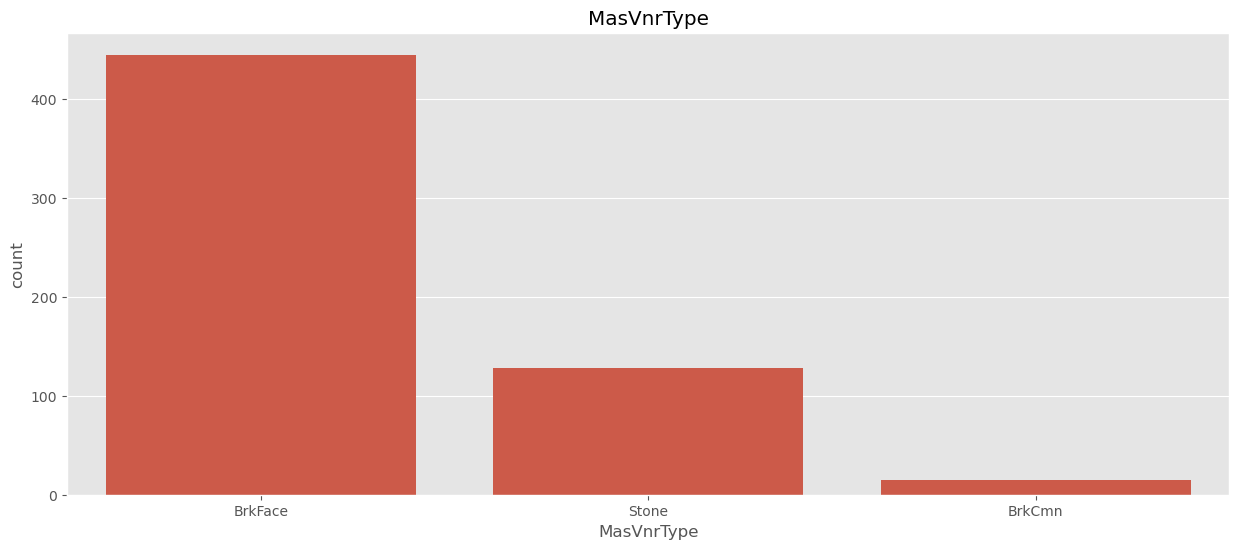

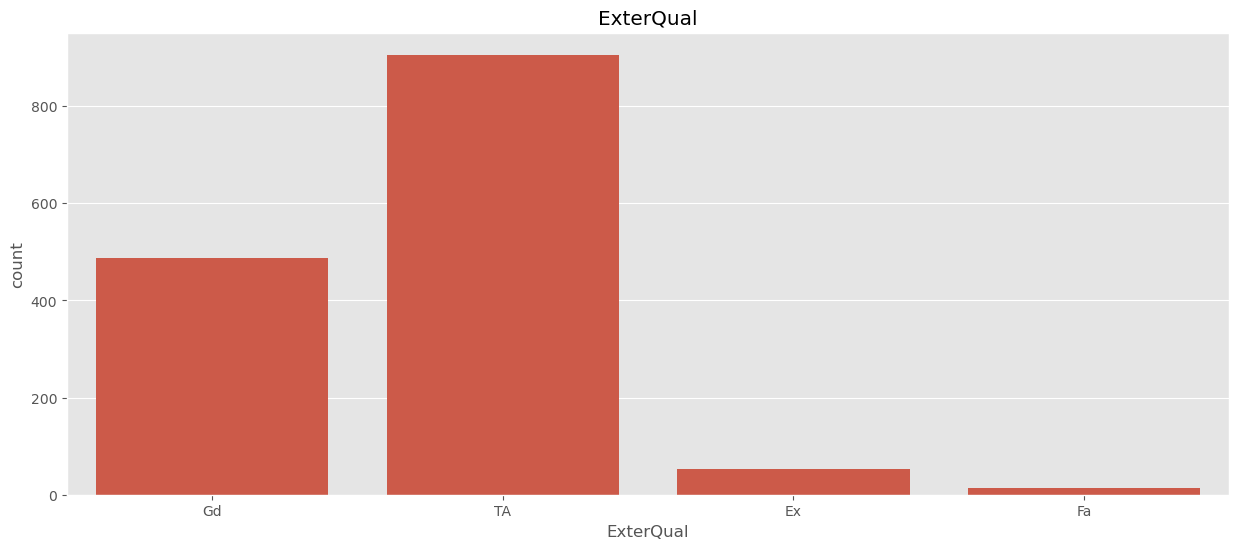

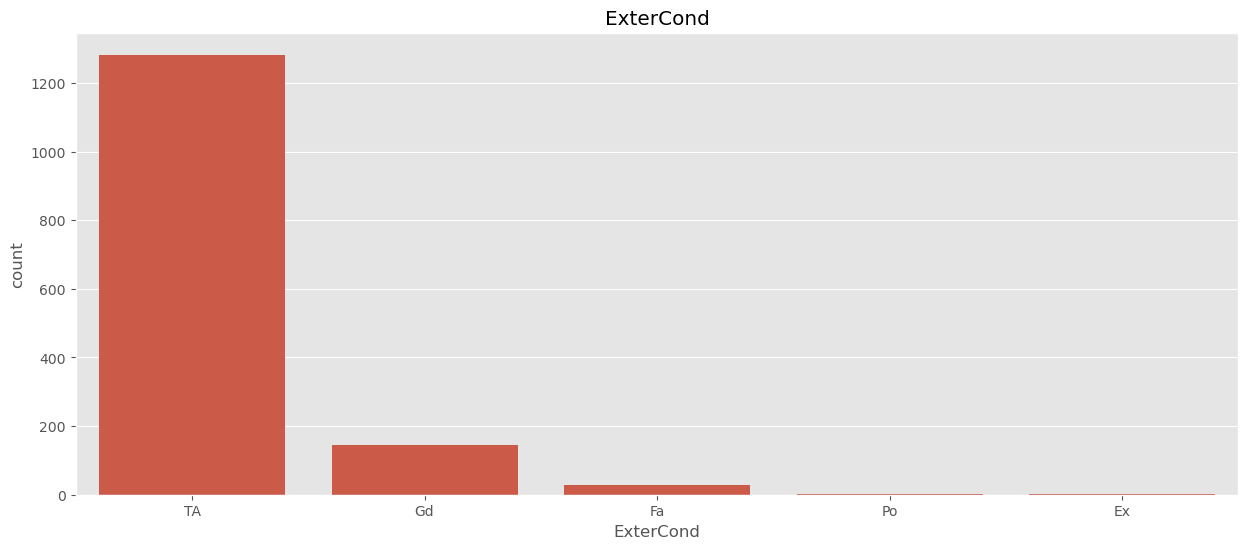

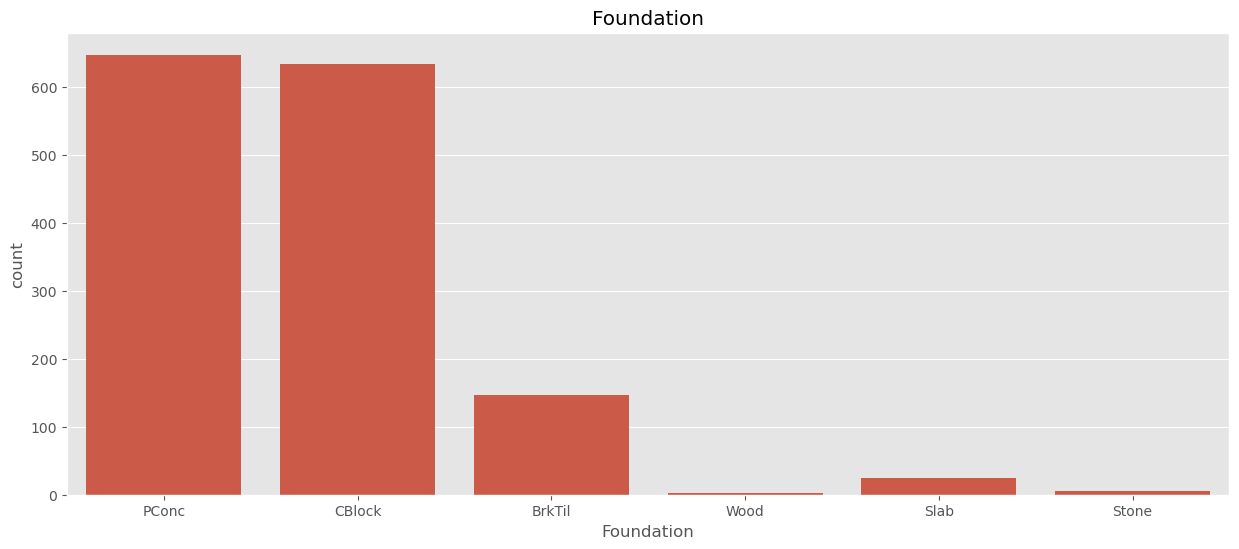

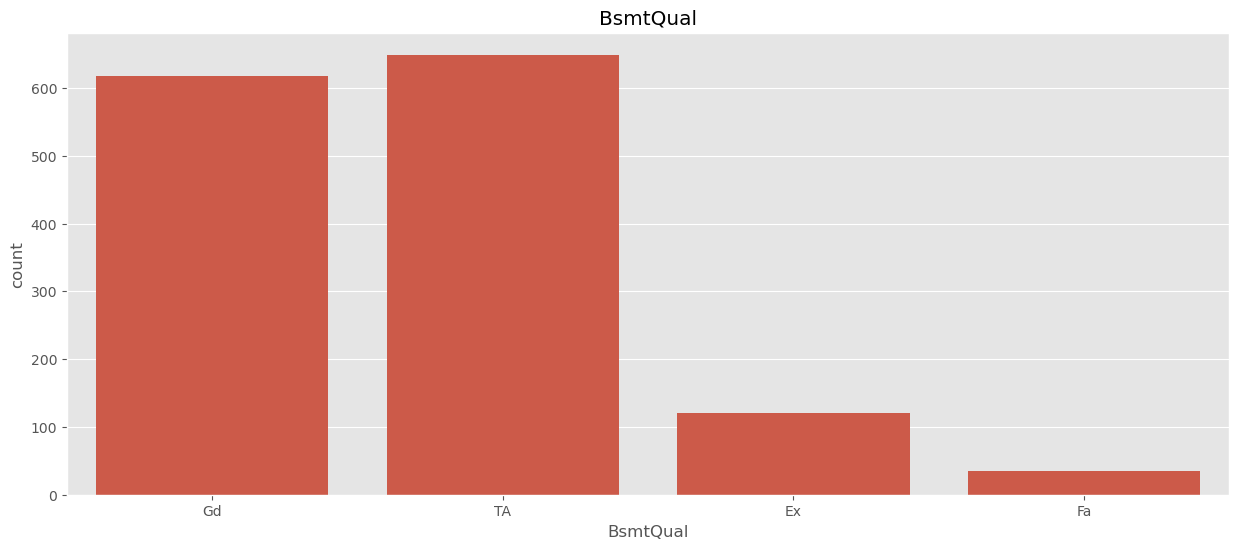

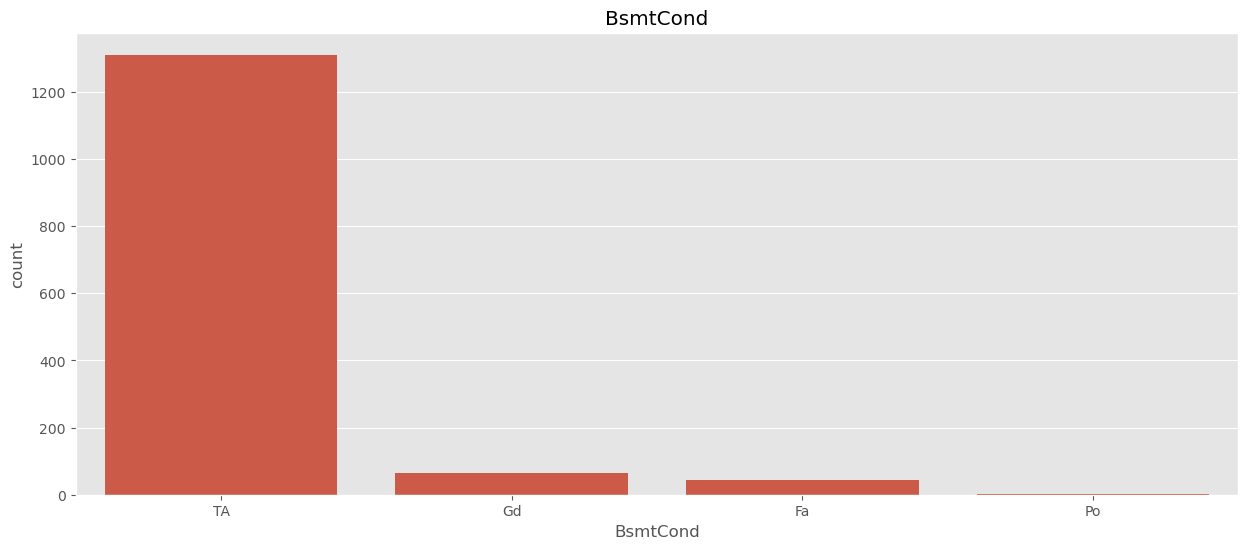

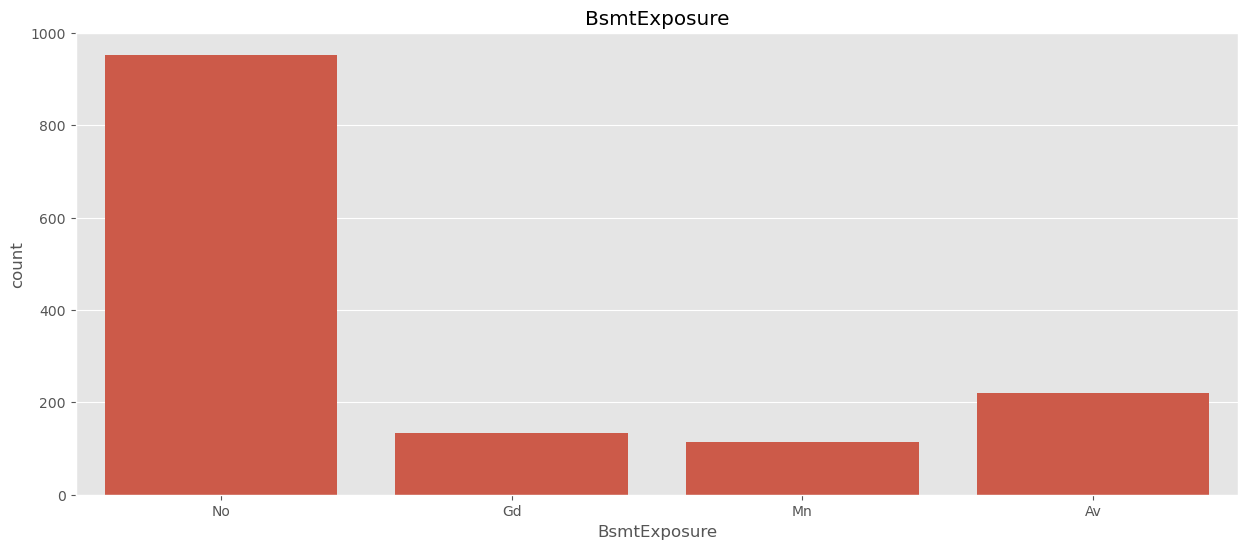

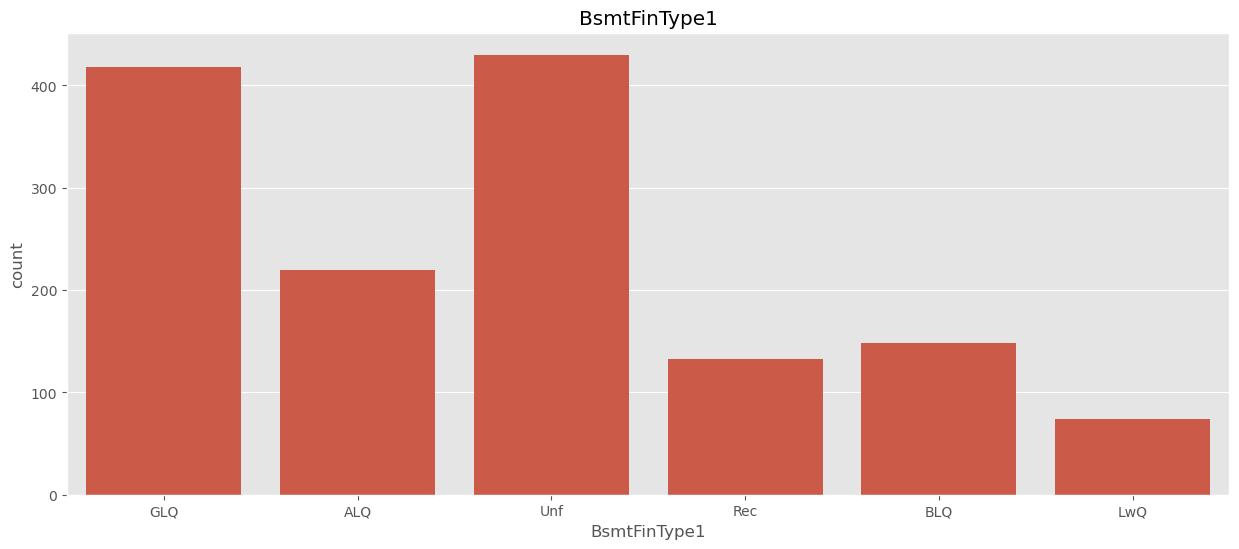

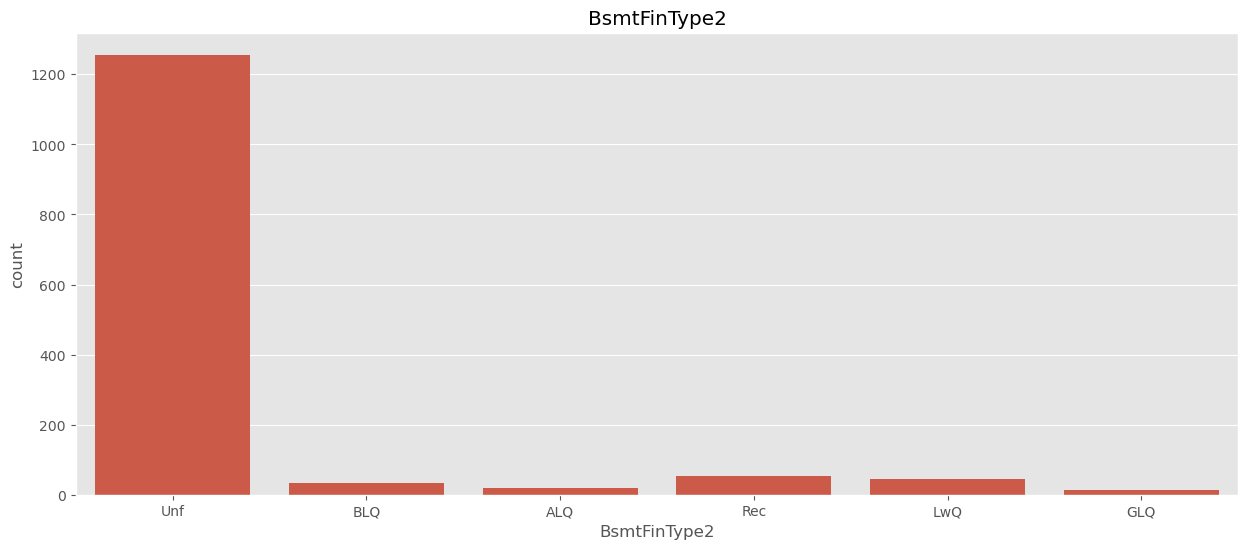

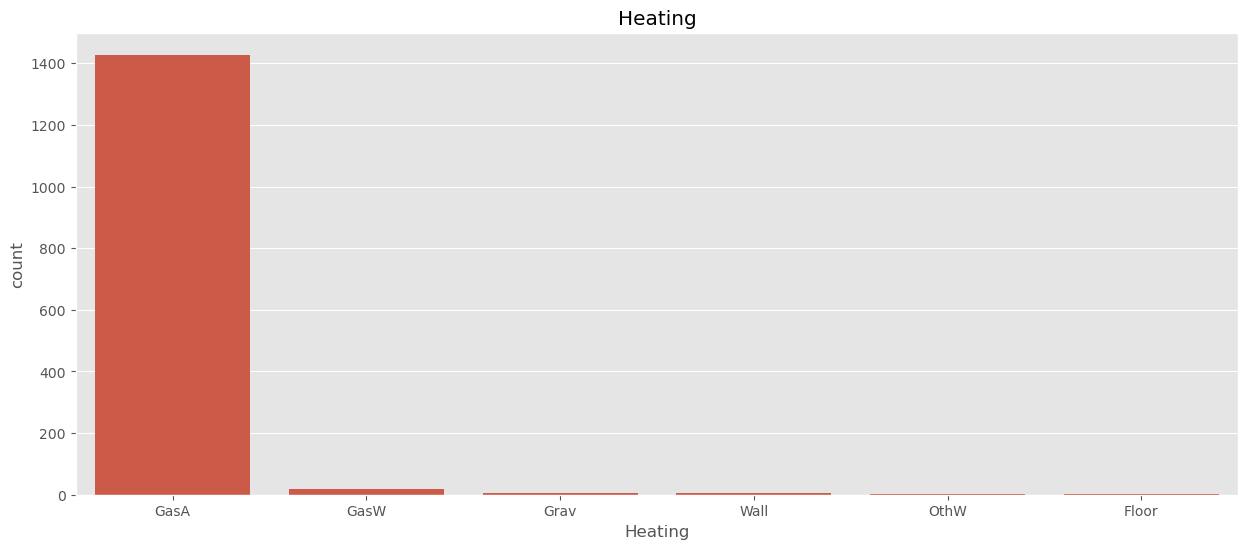

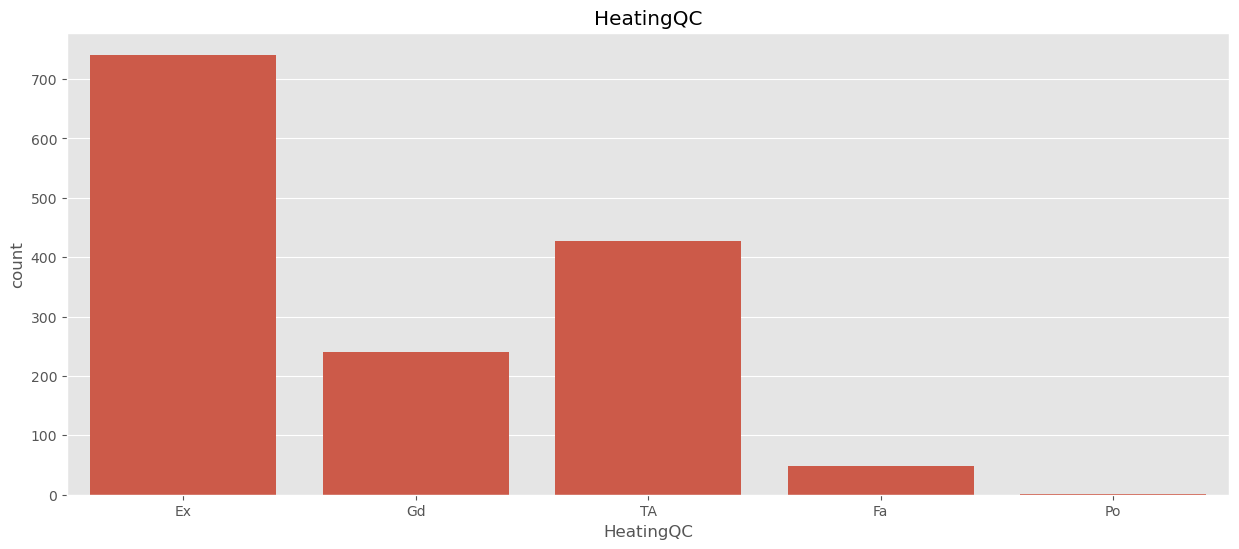

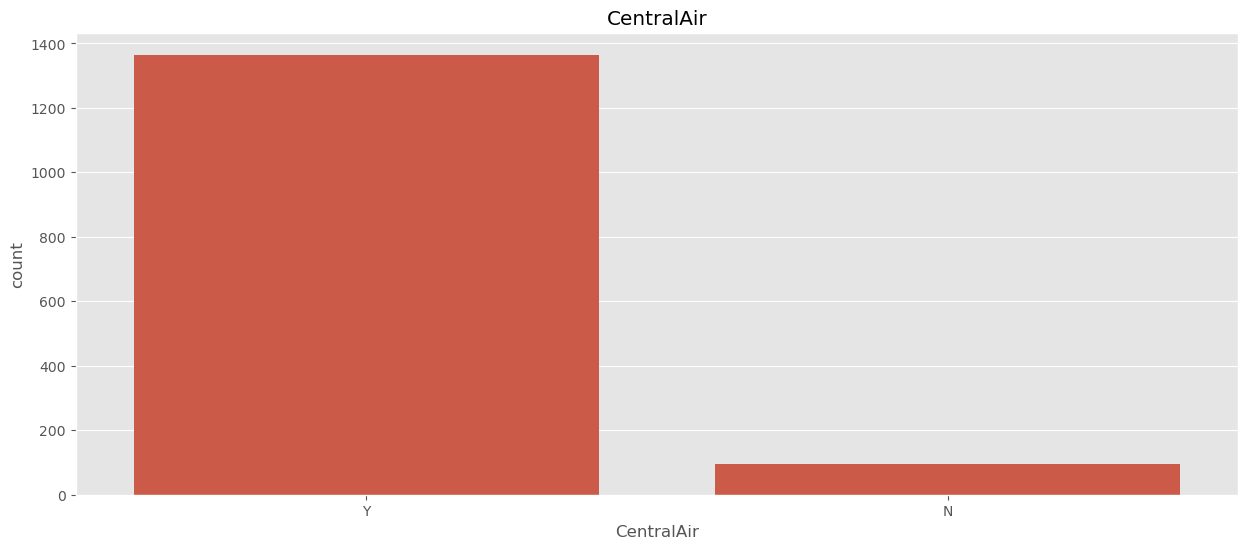

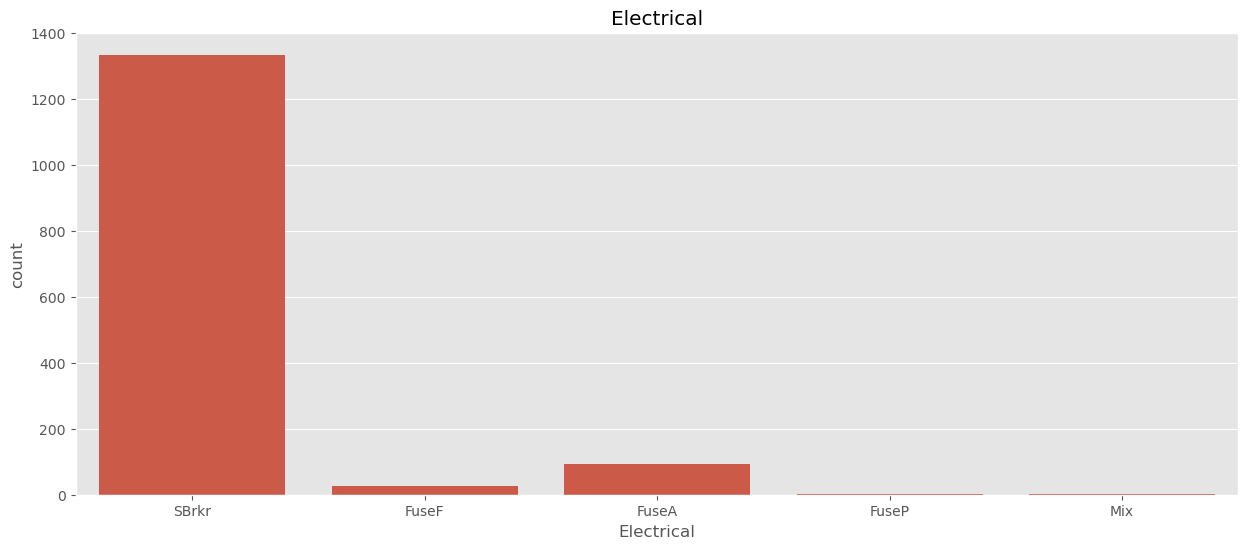

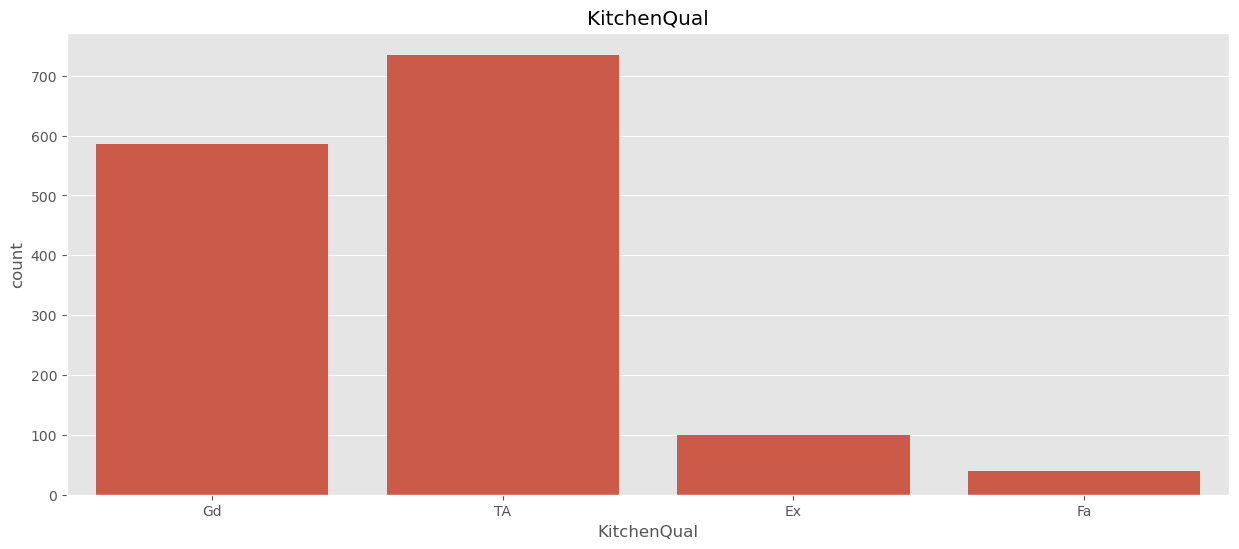

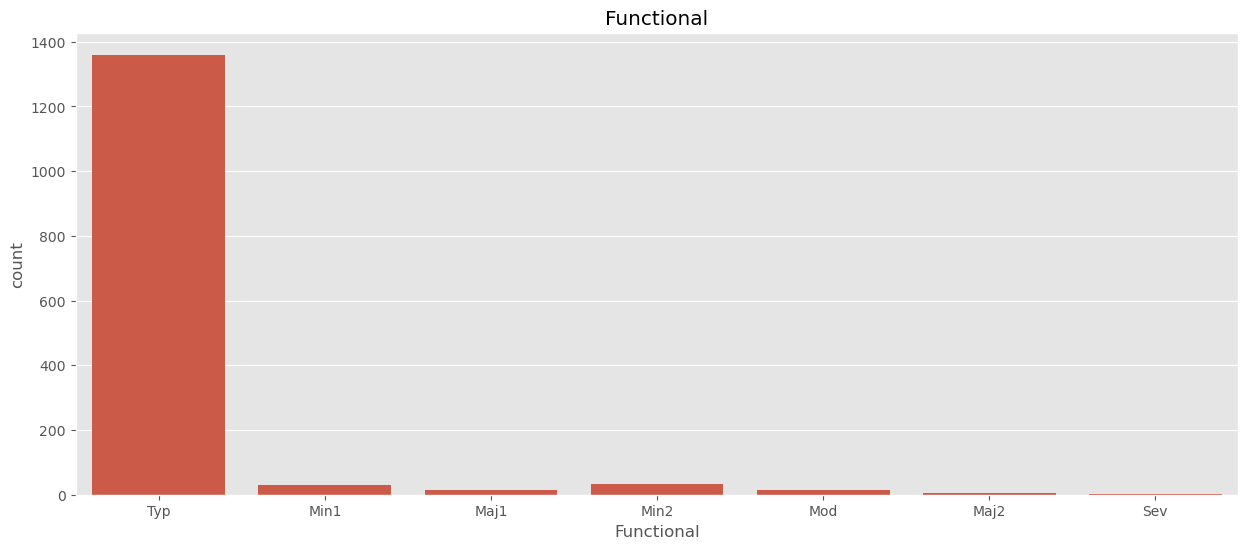

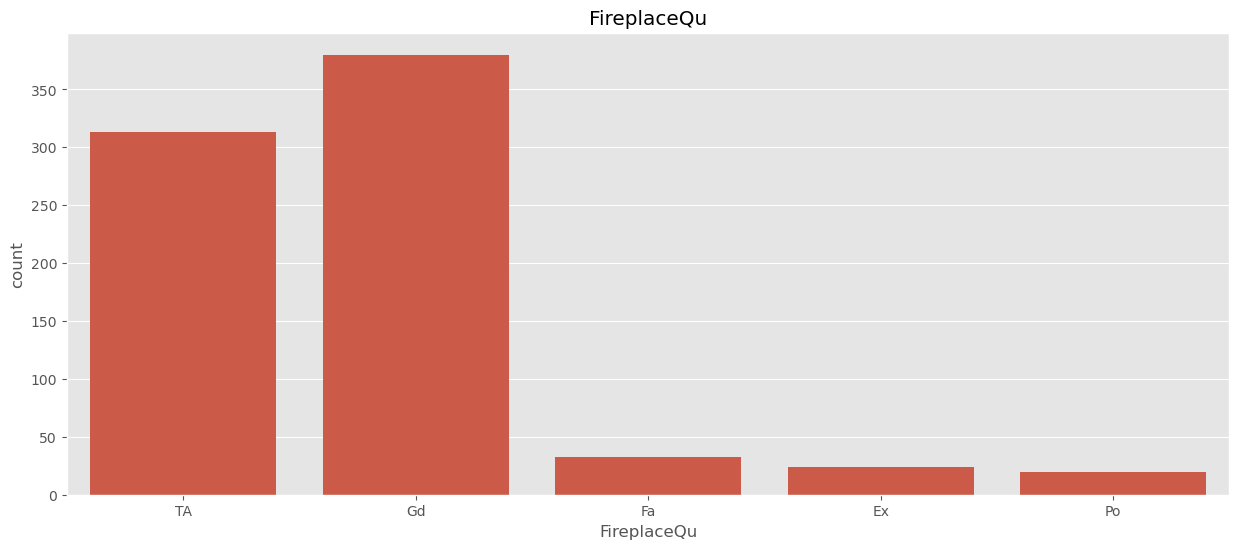

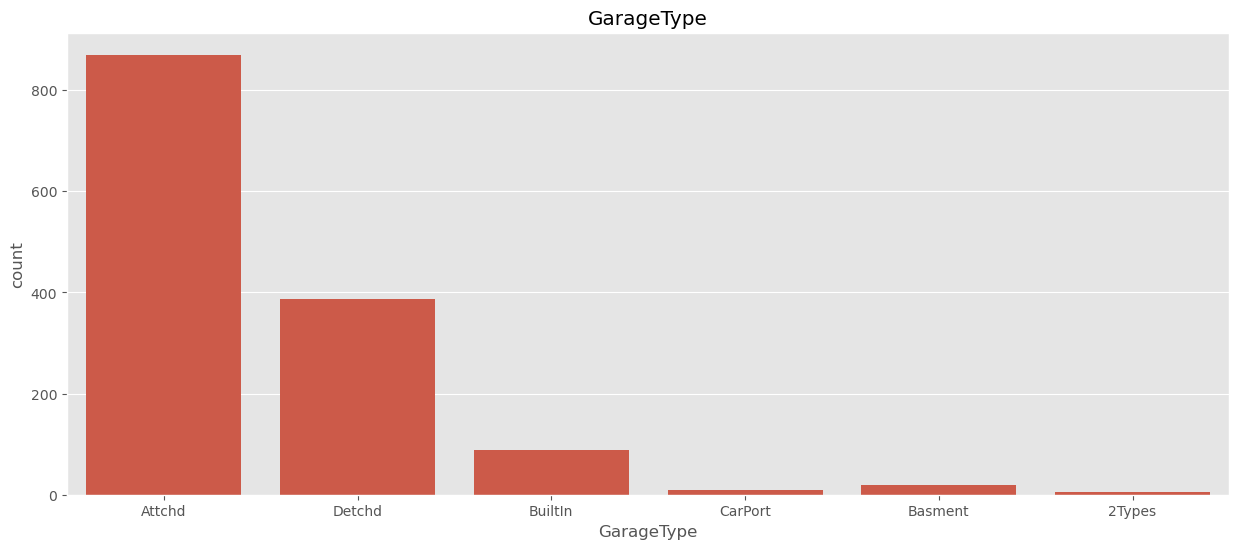

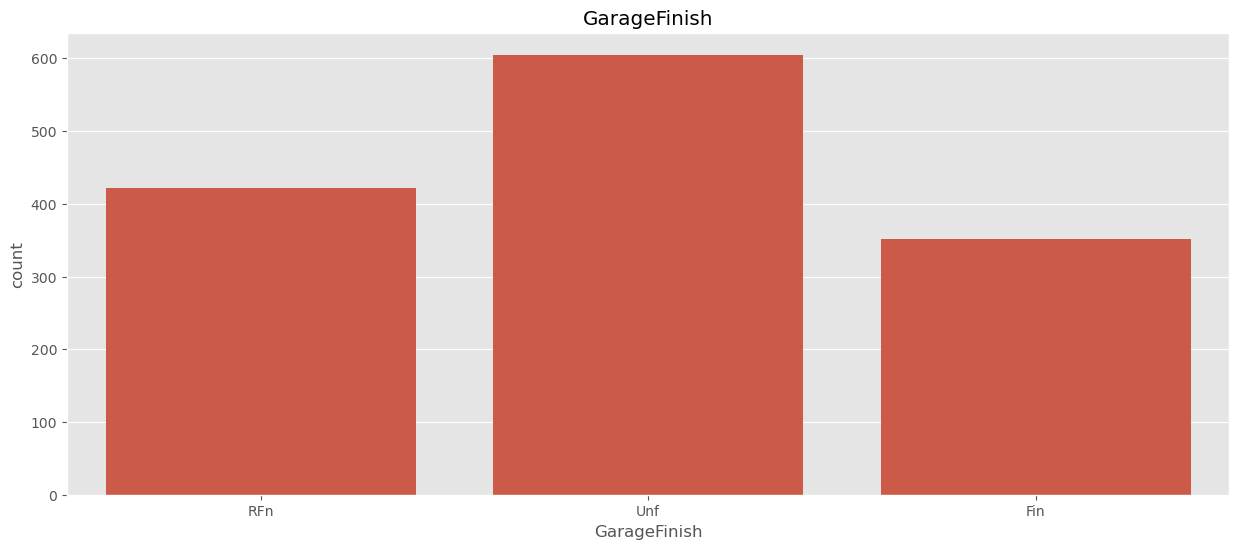

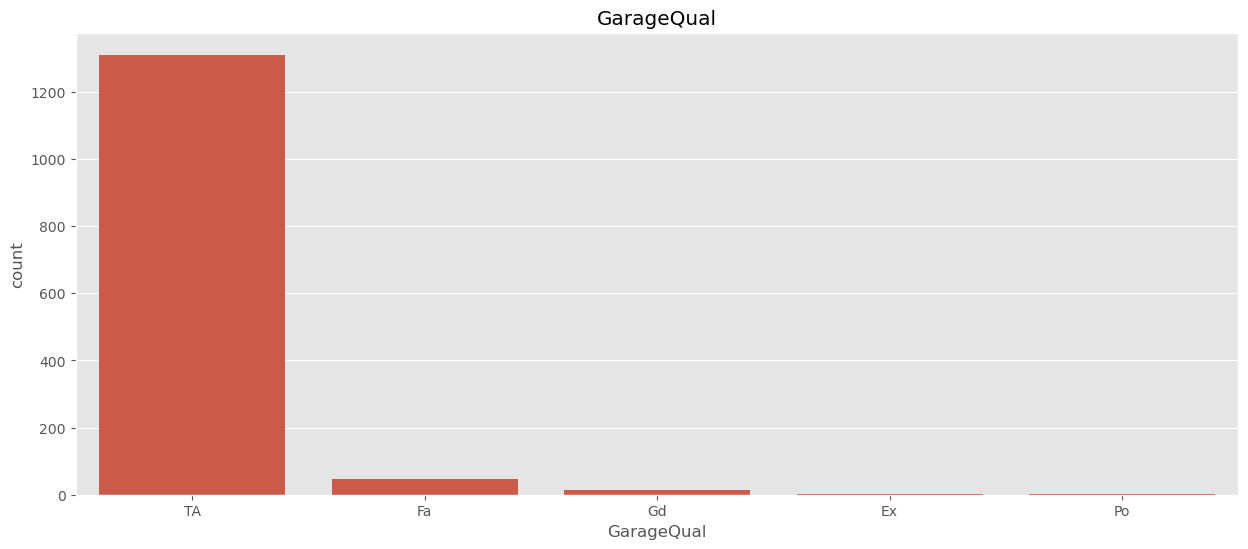

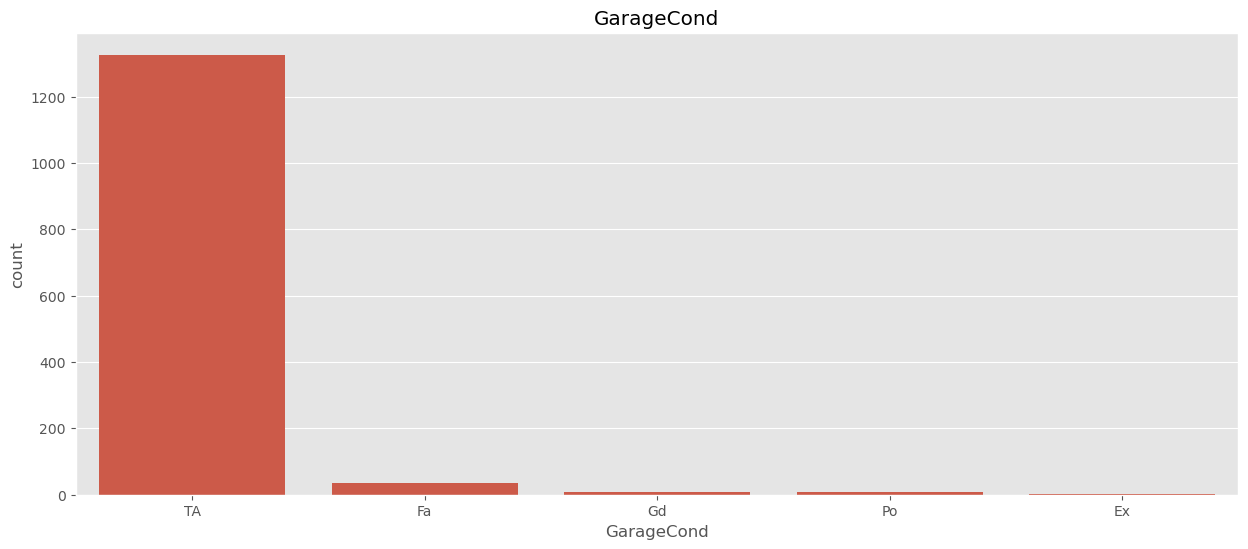

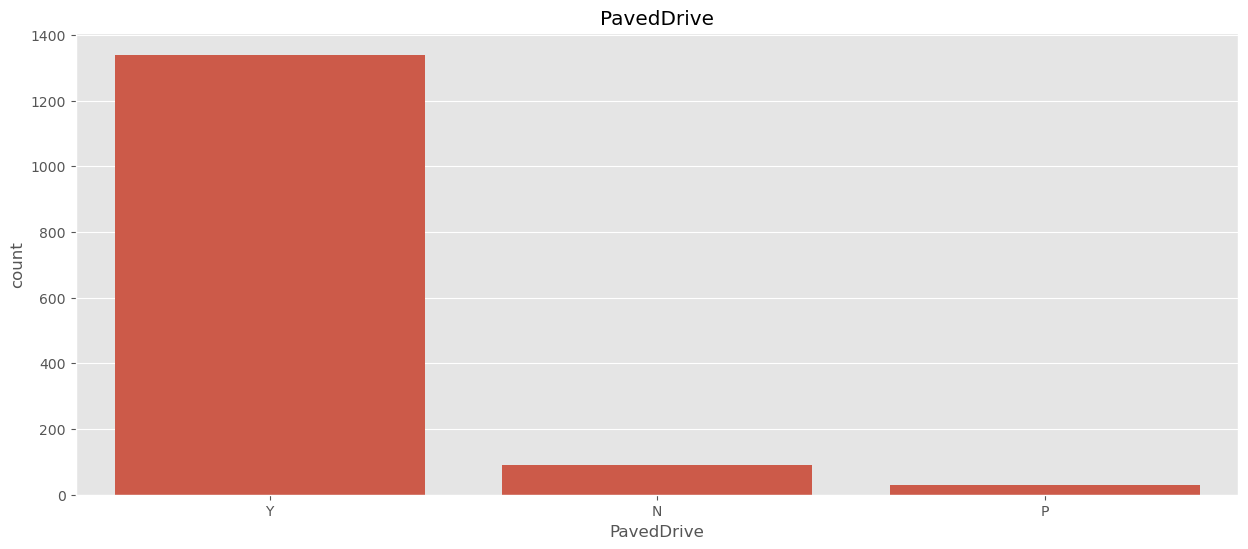

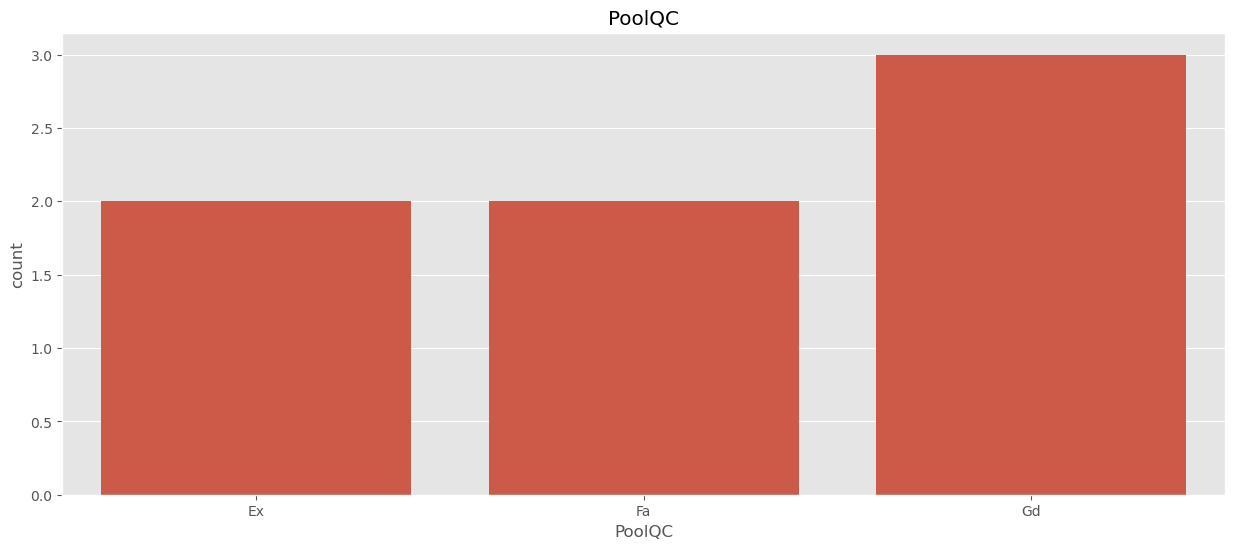

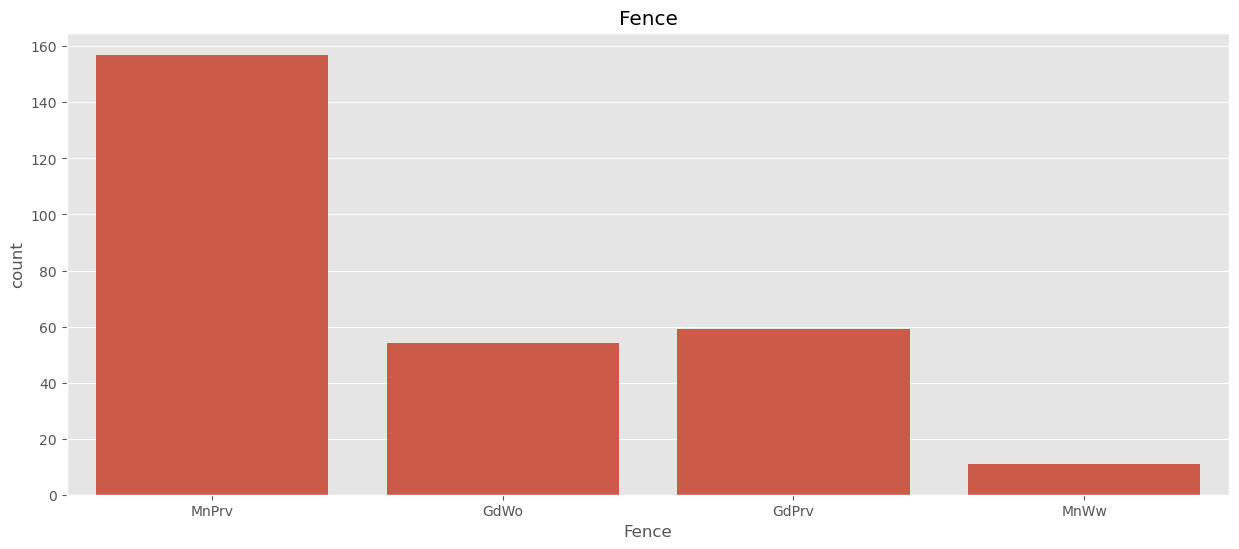

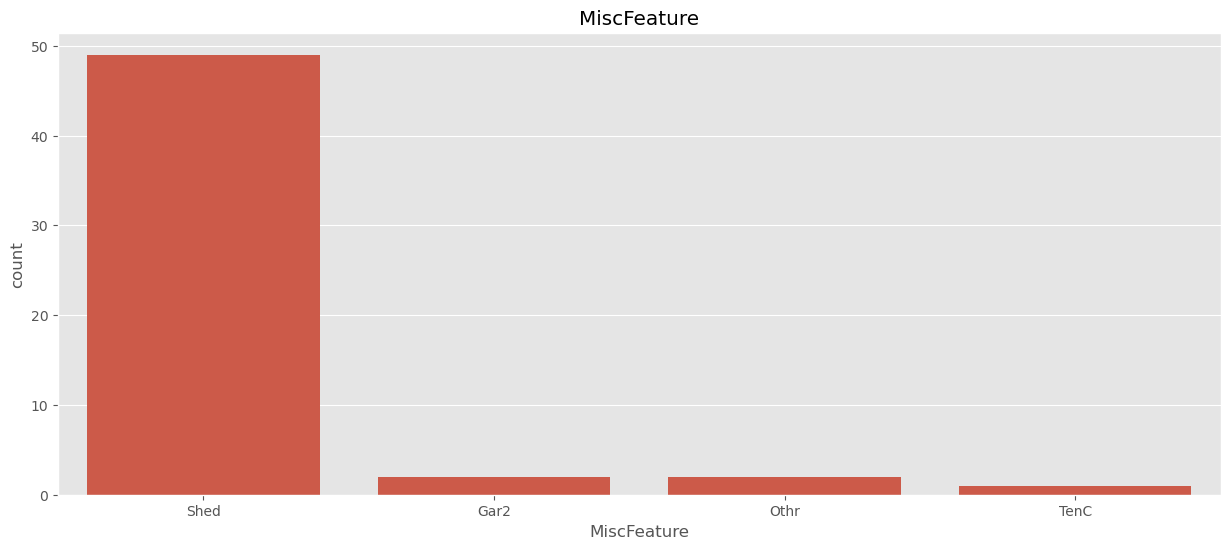

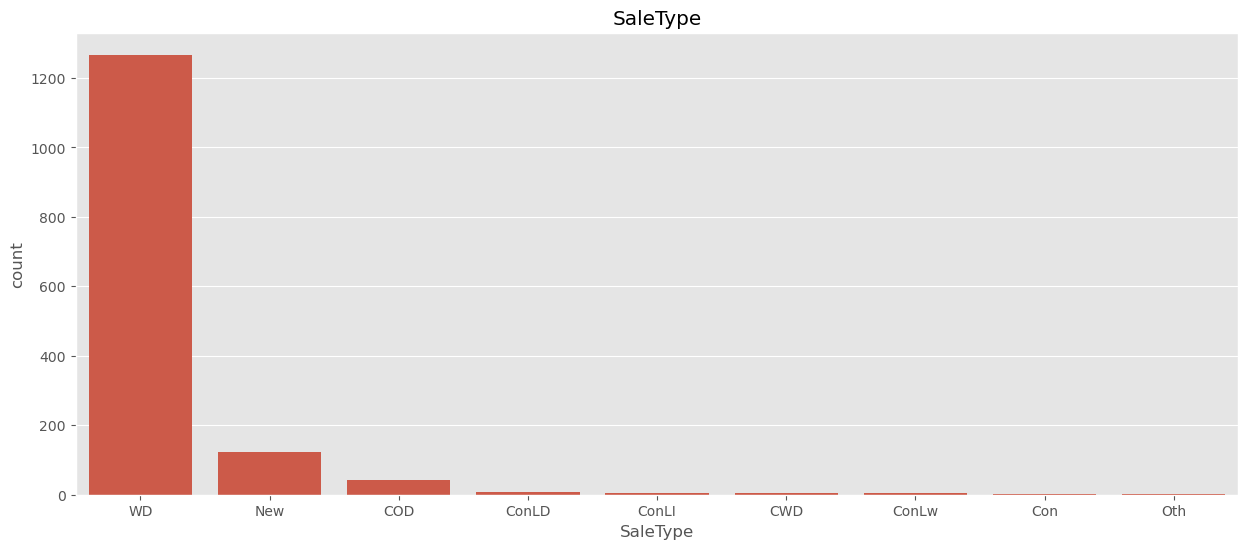

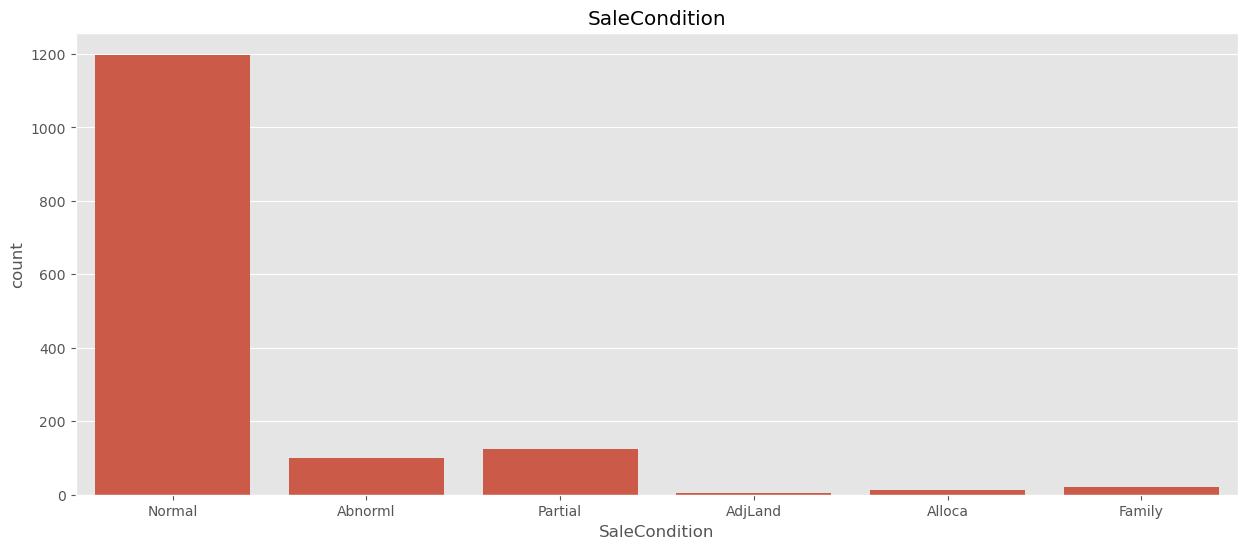

In [15]:
plot_categorical_data(df, target='SalePrice', classification=False)